# Webscrapping de datos de la noticias de la Casa Rosada

Documentación oficial: [ReadTheDocs](https://beautiful-soup-4.readthedocs.io/en/latest/) 

Información adicional sobre ``beautifulSoup``: [j3logo.com](https://j2logo.com/python/web-scraping-con-python-guia-inicio-beautifulsoup/)

Alternativa para webscrappig de sitios de noticias: [newspaper](http://theautomatic.net/2020/08/05/how-to-scrape-news-articles-with-python/)

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

### 1. Cargar la página con 'request'

El módulo ``request`` permite envíar peticiones HTTP usando Python

The requests module allows you to send HTTP requests using Python.

La petición HTTP devuelve un Objeto Response con toda la información obtenida (contenido, encoding, status, y demás). 

Para obtener el contenido de una página HTML y el status:


In [2]:
url = 'https://www.casarosada.gob.ar/informacion/actividad-oficial' 
res = requests.get(url)

In [7]:
txt = res.text
status = res.status_code
soup = BeautifulSoup(res.text, 'lxml')

print(txt, status)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="es-es" lang="es-es" dir="ltr" >
<head  prefix="og: http://ogp.me/ns#">
    <base href="https://www.casarosada.gob.ar/informacion/actividad-oficial" />
  <meta http-equiv="content-type" content="text/html; charset=utf-8" />
  <meta name="description" content="Enterate de todas las actividades del gobierno nacional. Sitio Oficial de la Casa Rosada" />
  <meta name="generator" content="Joomla! - Open Source Content Management" />
  <title>ACTIVIDAD OFICIAL</title>
  <link href="/informacion/actividad-oficial?format=feed&amp;type=rss" rel="alternate" type="application/rss+xml" title="RSS 2.0" />
  <link href="/informacion/actividad-oficial?format=feed&amp;type=atom" rel="alternate" type="application/atom+xml" title="Atom 1.0" />
  <link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon" />
  <link

In [8]:
news_panel = soup.find_all('div', class_='item')

In [9]:
type(news_panel)

bs4.element.ResultSet

In [10]:
news_panel

[<div class="item" itemprop="blogPost" itemscope="" itemtype="http://schema.org/BlogPosting">
 <a class="panel" href="/slider-principal/49943-el-presidente-se-reunio-con-destinatarias-del-programa-acompanar">
 <div class="panel-heading" style="background-image: url('/images/202306/AFG3-cropped.jpg')"></div>
 <!--<img src="/images/202306/AFG3-cropped.jpg" alt=""/>-->
 <div class="panel-body">
 <time>
 			    Viernes 02 de Junio de 2023			   
 		    </time>
 <div class="category-item-title">
 <h3>El presidente se reunió con destinatarias del Programa Acompañar</h3>
 </div>
 <div class="category-item-desc"></div>
 </div>
 </a>
 </div>,
 <div class="item" itemprop="blogPost" itemscope="" itemtype="http://schema.org/BlogPosting">
 <a class="panel" href="/slider-principal/49939-fernandez-y-arce-inauguraron-un-electroducto-que-permitira-mejorar-el-abastecimiento-de-energia-electrica">
 <div class="panel-heading" style="background-image: url('/images/202306/Bolivia3-cropped.jpg')"></div>
 <!--

### Paso 2: Iteramos por cada bloque, para obtener el título, la fecha y el link (solo primera página)

In [13]:
for news_item in news_panel:
    print('========================')
    time = news_item.find('time').get_text()
    news = news_item.find('h3').get_text()
#     enlace = news_item.find('a').get_text()
    for link in news_item.find_all('a'):
        enlace = link.get('href')
    print(time.strip())
    print(news)
    print(enlace)

Viernes 02 de Junio de 2023
El presidente se reunió con destinatarias del Programa Acompañar
/slider-principal/49943-el-presidente-se-reunio-con-destinatarias-del-programa-acompanar
Jueves 01 de Junio de 2023
Fernández y Arce inauguraron un electroducto que permitirá mejorar el abastecimiento de energía eléctrica
/slider-principal/49939-fernandez-y-arce-inauguraron-un-electroducto-que-permitira-mejorar-el-abastecimiento-de-energia-electrica
Jueves 01 de Junio de 2023
Alberto Fernández y Luis Arce remarcaron la importancia de incrementar el comercio bilateral y la cooperación estratégica
/slider-principal/49938-alberto-fernandez-y-luis-arce-remarcaron-la-importancia-de-incrementar-el-comercio-bilateral-y-la-cooperacion-estrategica
Jueves 01 de Junio de 2023
Alberto Fernández llegó a Bolivia para inaugurar el electroducto Juana Azurduy
/slider-principal/49937-alberto-fernandez-llego-a-bolivia-para-inaugurar-el-electroducto-juana-azurduy
Martes 30 de Mayo de 2023
El presidente Alberto Fer

#### Ahora, repetimos lo anterior pero para las primeras 10 páginas
Existen, al momento de escribir este notebook, 173 páginas.
Hay que tener cuidado con que nuestra IP no sea _banneada_ del sitio por repetidos intentos de conexión.
Vamos a descagar sólo las primeras 10 páginas 

In [14]:
# import re
news_block = []
# we can also perform searching by attribute values
# news_panel = soup.find_all(class_='panel-body')
# print(news_panel)
# print(news_panel)
for i in range(0,360,40):
    print("--------------------------")
    url = 'https://www.casarosada.gob.ar/informacion/actividad-oficial?start=' + str(i) 
    res = requests.get(url)
    txt = res.text
    status = res.status_code
    soup = BeautifulSoup(res.text, 'lxml')
    # print(txt)
    links = []
    news_panel = soup.find_all('div', class_='item')
    insert = []
    for news_item in news_panel:
        print('========================')
        time = news_item.find('time').get_text()
        time = time.strip()
        news = news_item.find('h3').get_text()
        for link in news_item.find_all('a'):
            enlace = link.get('href')
#             print(href)
#             links.append(href)
        print(time)
        print(news)
        print(enlace)
        insert = [time, news, enlace]
        news_block.append(insert)

--------------------------
Viernes 02 de Junio de 2023
El presidente se reunió con destinatarias del Programa Acompañar
/slider-principal/49943-el-presidente-se-reunio-con-destinatarias-del-programa-acompanar
Jueves 01 de Junio de 2023
Fernández y Arce inauguraron un electroducto que permitirá mejorar el abastecimiento de energía eléctrica
/slider-principal/49939-fernandez-y-arce-inauguraron-un-electroducto-que-permitira-mejorar-el-abastecimiento-de-energia-electrica
Jueves 01 de Junio de 2023
Alberto Fernández y Luis Arce remarcaron la importancia de incrementar el comercio bilateral y la cooperación estratégica
/slider-principal/49938-alberto-fernandez-y-luis-arce-remarcaron-la-importancia-de-incrementar-el-comercio-bilateral-y-la-cooperacion-estrategica
Jueves 01 de Junio de 2023
Alberto Fernández llegó a Bolivia para inaugurar el electroducto Juana Azurduy
/slider-principal/49937-alberto-fernandez-llego-a-bolivia-para-inaugurar-el-electroducto-juana-azurduy
Martes 30 de Mayo de 202

Jueves 27 de Abril de 2023
El presidente se reunió con el gobernador de Catamarca, Raúl Jalil
/slider-principal/49856-el-presidente-se-reunio-con-el-gobernador-de-catamarca-raul-jalil
Jueves 27 de Abril de 2023
Alberto Fernández y Lula da Silva dialogaron sobre los avances de los acuerdos comerciales firmados con Brasil
/slider-principal/49855-alberto-fernandez-y-lula-da-silva-dialogaron-sobre-los-avances-de-los-acuerdos-comerciales-firmados-con-brasil
Martes 25 de Abril de 2023
El presidente Alberto Fernández participó de la presentación del nuevo 911 Federal
/slider-principal/49852-el-presidente-alberto-fernandez-participo-de-la-presentacion-del-nuevo-911-federal
Martes 25 de Abril de 2023
El presidente Alberto Fernández se reunió con su par de Rumania, para fortalecer la relación bilateral
/slider-principal/49850-el-presidente-alberto-fernandez-se-reunio-con-su-par-de-rumania-para-fortalecer-la-relacion-bilateral
Martes 25 de Abril de 2023
El presidente Alberto Fernández recibió a s

Lunes 27 de Marzo de 2023
El presidente se reunió con Susan Segal y líderes empresariales del Council of the Americas
/slider-principal/49769-el-presidente-se-reunio-con-susan-segal-y-lideres-empresariales-del-council-of-the-americas
Lunes 27 de Marzo de 2023
El presidente se reunió con académicas y académicos en Nueva York
/slider-principal/49768-el-presidente-se-reunio-con-academicas-y-academicos-en-nueva-york
Lunes 27 de Marzo de 2023
El presidente felicitó al matemático argentino, Luis Caffarelli
/slider-principal/49767-el-presidente-felicito-al-matematico-argentino-luis-caffarelli
Domingo 26 de Marzo de 2023
Comenzaron los Conciertos por la Democracia en Olivos 
/slider-principal/49766-comenzaron-los-conciertos-por-la-democracia-en-olivos
Sábado 25 de Marzo de 2023
Alberto Fernández: “Si queremos una Iberoamérica justa y sostenible, el primer paso que debemos dar es restablecer la unidad”
/slider-principal/49764-alberto-fernandez-si-queremos-una-iberoamerica-justa-y-sostenible-el-

Jueves 02 de Marzo de 2023
El presidente inauguró el festival Nosotras Movemos el Mundo por la Democracia
/slider-principal/49696-el-presidente-inauguro-el-festival-nosotras-movemos-el-mundo-por-la-democracia
Jueves 02 de Marzo de 2023
El presidente entregó las primeras viviendas para comunidades rurales y pueblos originarios en La Poma, Salta
/slider-principal/49695-el-presidente-entrego-las-primeras-viviendas-para-comunidades-rurales-y-pueblos-originarios-en-la-poma-salta
Miércoles 01 de Marzo de 2023
El presidente destacó en su discurso a personas beneficiadas por las políticas del Gobierno nacional
/informacion/actividad-oficial/9-noticias/49691-el-presidente-destaco-en-su-discurso-a-personas-beneficiadas-por-las-politicas-del-gobierno-nacional
Miércoles 01 de Marzo de 2023
Alberto Fernández: "Construimos la democracia, vivimos en libertad, alcancemos la igualdad"
/slider-principal/49689-alberto-fernandez-construimos-la-democracia-vivimos-en-libertad-alcancemos-la-igualdad
Martes 2

Miércoles 25 de Enero de 2023
Alberto Fernández se reunió con la presidenta de Honduras y el director general de la FAO
/slider-principal/49603-alberto-fernandez-se-reunio-con-la-presidenta-de-honduras-y-el-director-general-de-la-fao
Miércoles 25 de Enero de 2023
Alberto Fernández mantuvo una reunión con el asesor presidencial para las Américas de Estados Unidos, Christopher Dodd
/slider-principal/49602-alberto-fernandez-mantuvo-una-reunion-con-el-asesor-presidencial-para-las-americas-de-estados-unidos-christopher-dodd
Miércoles 25 de Enero de 2023
El presidente recibió al Primer Ministro de Haití
/informacion/actividad-oficial/9-noticias/49601-el-presidente-recibio-al-primer-ministro-de-haiti
Miércoles 25 de Enero de 2023
El presidente se reunió con su par de Cuba, Miguel Díaz-Canel 
/informacion/actividad-oficial/9-noticias/49600-el-presidente-se-reunio-con-su-par-de-cuba-miguel-diaz-canel
Miércoles 25 de Enero de 2023
Alberto Fernández se reunió con el titular del Consejo Europeo, C

Lunes 02 de Enero de 2023
Alberto Fernández: "Hemos decidido volver a poner en marcha el vínculo entre Argentina y Brasil con toda la fuerza que siempre debió tener"
/slider-principal/49508-alberto-fernandez-hemos-decidido-volver-a-poner-en-marcha-el-vinculo-entre-argentina-y-brasil-con-toda-la-fuerza-que-siempre-debio-tener
Domingo 01 de Enero de 2023
Alberto Fernández: "Con la llegada de Lula va a ser mucho más fácil hablar de integración"
/slider-principal/49505-alberto-fernandez-con-la-llegada-de-lula-va-a-ser-mucho-mas-facil-hablar-de-integracion
Domingo 01 de Enero de 2023
El presidente participó del acto de jura de Lula en el Congreso nacional de Brasil
/slider-principal/49504-el-presidente-participo-del-acto-de-jura-de-lula-en-el-congreso-nacional-de-brasil
Domingo 01 de Enero de 2023
El presidente llegó a Brasil para asistir a la asunción de Lula
/slider-principal/49503-el-presidente-llego-a-brasil-para-asistir-a-la-asuncion-de-lula
Domingo 01 de Enero de 2023
Mensaje del Pres

Viernes 02 de Diciembre de 2022
El presidente recibió a las máximas autoridades de CAF en Casa Rosada
/slider-principal/49423-el-presidente-recibio-a-las-maximas-autoridades-de-caf-en-casa-rosada
Jueves 01 de Diciembre de 2022
El presidente reglamentó la Ley de respuesta integral al VIH
/informacion/actividad-oficial/9-noticias/49421-el-presidente-reglamento-la-ley-de-respuesta-integral-al-vih
Jueves 01 de Diciembre de 2022
El presidente le tomó juramento al nuevo ministro de Transporte, Diego Giuliano
/slider-principal/49419-el-presidente-le-tomo-juramento-al-nuevo-ministro-de-transporte-diego-giuliano
Jueves 01 de Diciembre de 2022
El Gobierno acordó con los gremios un nuevo aumento del salario Mínimo Nacional Docente Garantizado
/informacion/actividad-oficial/9-noticias/49418-el-gobierno-acordo-con-los-gremios-un-nuevo-aumento-del-salario-minimo-nacional-docente-garantizado
Jueves 01 de Diciembre de 2022
Desde San Luis el presidente apeló a la unidad para reconstruir la Argentina
/i

Viernes 11 de Noviembre de 2022
El presidente participó de la cena de cierre del Foro de París sobre la Paz
/informacion/actividad-oficial/9-noticias/49355-el-presidente-participo-de-la-cena-de-cierre-del-foro-de-paris-sobre-la-paz
Viernes 11 de Noviembre de 2022
Los presidentes de Francia, Colombia y Argentina expresaron su pleno apoyo a la reanudación del proceso de negociación entre venezolanos
/slider-principal/49354-los-presidentes-de-francia-colombia-y-argentina-expresaron-su-pleno-apoyo-a-la-reanudacion-del-proceso-de-negociacion-entre-venezolanos
Viernes 11 de Noviembre de 2022
Argentina presenta a Cecilia Todesca Bocco como candidata a la Presidencia del BID
/informacion/actividad-oficial/9-noticias/49353-argentina-presenta-a-cecilia-todesca-bocco-como-candidata-a-la-presidencia-del-bid
Viernes 11 de Noviembre de 2022
Alberto Fernández: "Nada es más revolucionario en el mundo del presente que reclamar la paz"
/slider-principal/49351-alberto-fernandez-nada-es-mas-revolucionario

Martes 25 de Octubre de 2022
El presidente se reunió con Josep Borrell, Alto Representante de la Unión Europea
/informacion/actividad-oficial/9-noticias/49260-el-presidente-se-reunio-con-josep-borrell-alto-representante-de-la-union-europea
Martes 25 de Octubre de 2022
El presidente Alberto Fernández recibió a una delegación del Congreso estadounidense
/slider-principal/49259-el-presidente-alberto-fernandez-recibio-a-una-delegacion-del-congreso-estadounidense
Lunes 24 de Octubre de 2022
El presidente recorrió las obras de restauración y puesta en valor de un museo histórico en Mar del Plata
/informacion/actividad-oficial/9-noticias/49257-el-presidente-recorrio-las-obras-de-restauracion-y-puesta-en-valor-de-un-museo-historico-en-mar-del-plata
Lunes 24 de Octubre de 2022
Con más de 25.000 jóvenes el presidente encabezó la inauguración de los Juegos Nacionales Evita 2022
/slider-principal/49256-con-mas-de-25-000-jovenes-el-presidente-encabezo-la-inauguracion-de-los-juegos-nacionales-evita-

In [16]:
news_block[2]

['Jueves 01 de Junio de 2023',
 'Alberto Fernández y Luis Arce remarcaron la importancia de incrementar el comercio bilateral y la cooperación estratégica',
 '/slider-principal/49938-alberto-fernandez-y-luis-arce-remarcaron-la-importancia-de-incrementar-el-comercio-bilateral-y-la-cooperacion-estrategica']

In [17]:
for item in news_block:
    print('-------------------------------------------------------_')
    print(item)

-------------------------------------------------------_
['Viernes 02 de Junio de 2023', 'El presidente se reunió con destinatarias del Programa Acompañar', '/slider-principal/49943-el-presidente-se-reunio-con-destinatarias-del-programa-acompanar']
-------------------------------------------------------_
['Jueves 01 de Junio de 2023', 'Fernández y Arce inauguraron un electroducto que permitirá mejorar el abastecimiento de energía eléctrica', '/slider-principal/49939-fernandez-y-arce-inauguraron-un-electroducto-que-permitira-mejorar-el-abastecimiento-de-energia-electrica']
-------------------------------------------------------_
['Jueves 01 de Junio de 2023', 'Alberto Fernández y Luis Arce remarcaron la importancia de incrementar el comercio bilateral y la cooperación estratégica', '/slider-principal/49938-alberto-fernandez-y-luis-arce-remarcaron-la-importancia-de-incrementar-el-comercio-bilateral-y-la-cooperacion-estrategica']
-------------------------------------------------------_
['

### Paso 3: Obtener la nota completa, el título y la fecha de cada link.

In [37]:
news_block[0]

['Viernes 30 de Septiembre de 2022',
 'El presidente entregó en Río Negro la vivienda 60.000 de su gestión de Gobierno',
 '/slider-principal/49181-el-presidente-entrego-en-rio-negro-la-vivienda-60-000-de-su-gestion-de-gobierno']

In [18]:
base_url = 'https://www.casarosada.gob.ar'

# Definimos los elementos a usar en el bucle
# site = []
dict_news = {}
i=0

# Arrancamos del 1 y no del 0 porque el 1 es un comunicado de prensa, que tiene otros estilo para el párrafo
# Hay que ver como se modifica la noticia con el paso de los dias
# news_block_ = news_block[1:5]
for item in news_block:
    i = i+1
    strip_news = ''
    
    # Creamos la variable donde se guarda el link con la noticia a descargar.
    url = base_url + item[2]
    res = requests.get(url)
    txt = res.text
    soup = BeautifulSoup(res.text, 'lxml')
    
    title = soup.find('h2', attrs={'class': None}).get_text()
    date = soup.find('time', class_='pull-right').get_text().strip()
    body = soup.find_all('p', attrs={'class':None})
    
    
    # Armamos un for para limpiar cada elemento del find_all
    for p_element in body:
        strip_news = strip_news + p_element.text
    # Cargamos las noticias en un dict
    dict_news.update({i:{'title':title,
                    'date':date,
                    'body':strip_news}
                    })

In [20]:
dict_news

{1: {'title': 'El presidente se reunió con destinatarias del Programa Acompañar',
  'date': 'Viernes 02 de junio de 2023',
  'body': 'El presidente Alberto Fernández compartió un encuentro esta mañana en la Residencia de Olivos, junto a la ministra de las Mujeres, Géneros y Diversidad, Ayelén Mazzina, con destinatarias del programa Acompañar, en las vísperas del 8° aniversario de la movilización bajo la consigna Ni Una Menos, que busca concientizar sobre la violencia por motivos de género y su manifestación más extrema como son los femicidios.“Fue un encuentro cálido y se puso en valor una política pública implementada por este Gobierno Nacional, que muestra el compromiso y la convicción política en la temática”, describió Mazzina y destacó que ya se acompañó a “más de 297 mil mujeres y LGBTI+ en situación de violencia por motivos de género desde que se creó el programa”.El programa Acompañar está dirigido a mujeres y LGBTI+ en situación de violencia de género de todo el país con el ob

### Paso 4: Guardamos toda la info en un dataframes, y lo respaldamos en un _.csv_ en nuestro disco.

In [21]:
df = pd.DataFrame(dict_news).transpose()

In [22]:
df

title  \
1    El presidente se reunió con destinatarias del ...   
2    Fernández y Arce inauguraron un electroducto q...   
3    Alberto Fernández y Luis Arce remarcaron la im...   
4    Alberto Fernández llegó a Bolivia para inaugur...   
5    El presidente Alberto Fernández se reunió con ...   
..                                                 ...   
356  "El desafío es ver cómo nos desarrollamos pres...   
357  ”Los clubes de barrio ayudan a formar el espír...   
358  “Poder conocer y saber es el secreto del futur...   
359  "Tengamos el orgullo de ser uno de los diez pa...   
360  El presidente llegó a Córdoba donde encabezará...   

                                date  \
1        Viernes 02 de junio de 2023   
2         Jueves 01 de junio de 2023   
3         Jueves 01 de junio de 2023   
4         Jueves 01 de junio de 2023   
5          Martes 30 de mayo de 2023   
..                               ...   
356  Miércoles 05 de octubre de 2022   
357     Martes 04 de octubre de 2022   
358     Martes 04 de octubre de 2022   
359      Lunes 03 de octubre de 2022   
360      Lunes 03 de octubre de 2022   

                                                  body  
1    El presidente Alberto Fernández compartió un e...  
2    El presidente Alberto Fernández inauguró hoy e...  
3    El presidente Alberto Fernández mantuvo hoy un...  
4    El presidente Alberto Fernández llegó esta tar...  
5    El presidente Alberto Fernández y el mandatari...  
..                                                 ...  
356  El presidente Alberto Fernández encabezó, junt...  
357  El presidente Alberto Fernández presentó hoy, ...  
358   El presidente Alberto Fernández encabezó este...  
359  El presidente Alberto Fernández encabezó hoy e...  
360  El presidente Alberto Fernández arribó a Córdo...  

[360 rows x 3 columns]

In [23]:
df.to_csv('casa_rosada_noticas_webscrapping.csv', index= False)

In [24]:
df = pd.read_csv('casa_rosada_noticas_webscrapping.csv')

## Word cloud

In [ ]:
# !pip install nltk

In [25]:
import nltk
from nltk.tokenize import word_tokenize

In [26]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /home/mato/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
# !pip install pillow wordcloud

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [41]:
def preprocessing(data, added_stop_words):
    # Cargamos las 'stop words' en español
    stop_words = nltk.corpus.stopwords.words('spanish')
    # Convertimos el texto a minúsculas
    data = data.str.lower()
    
    # Concatenamos todas las celdas de la columna, separando con un espacio,
    # para armar un gran texto con todas las noticias unidas.
    paragraph = ' '.join(data)
    
    # _tokenizamos_ el párrafo con el tokenizados que trae nlpk
    # tokinizar siginifica dividir el párrafo una lista, con cada elemento siendo una palabra
    word_tokens = word_tokenize(paragraph) 
    
    # Filtramos las palabras del párrafo que están en la lista de 'stop words'
    preprocessing_result = ' '.join([word for word in word_tokens if not word in stop_words])
    word_tokens_added = word_tokenize(preprocessing_result)
    preprocessing_result = ' '.join([word for word in word_tokens_added if not word in added_stop_words])
    # Devolvemos un sólo párrafo, procesado.
    return preprocessing_result


In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mato/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
words = preprocessing(df['body'])

In [37]:
words

"presidente alberto fernández compartió encuentro mañana residencia olivos , junto ministra mujeres , géneros diversidad , ayelén mazzina , destinatarias programa acompañar , vísperas 8° aniversario movilización bajo consigna menos , busca concientizar violencia motivos género manifestación extrema femicidios. “ encuentro cálido puso valor política pública implementada gobierno nacional , muestra compromiso convicción política temática ” , describió mazzina destacó acompañó “ 297 mil mujeres lgbti+ situación violencia motivos género creó programa ” .el programa acompañar dirigido mujeres lgbti+ situación violencia género país objetivo principal fortalecer independencia económica . contempla apoyo económico equivalente salario mínimo , vital móvil 6 meses acompañamiento integral fortalecimiento psicosocial parte equipos interdisciplinarios unidades acompañamiento ( uda ) , conformadas provincias , municipios ciudad buenos aires.la ministra recordó “ 3 junio 2015 marcó después sociedad ”

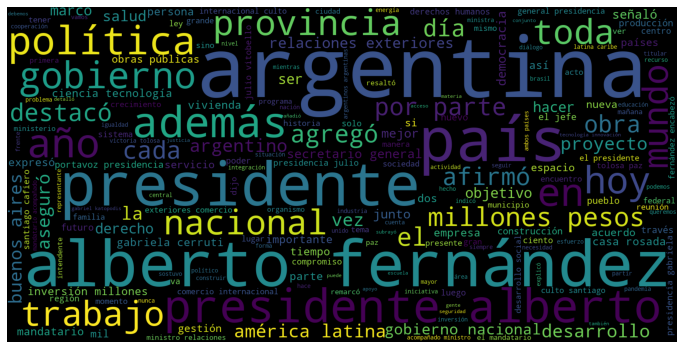

In [40]:
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      max_font_size=200, 
                      random_state=1, 
                      background_color="black").generate(words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [57]:
# Grabamos la imagen
wordcloud.to_file('word_cloud_casa_rosada.png')

### Alternativa: Agregando _stop_words_ por fuera de la lista de nlpk

In [42]:
added = ['alberto fernández','argentina', 'alberto', 'fernández', 'presidente']
words = preprocessing(df['body'], added)

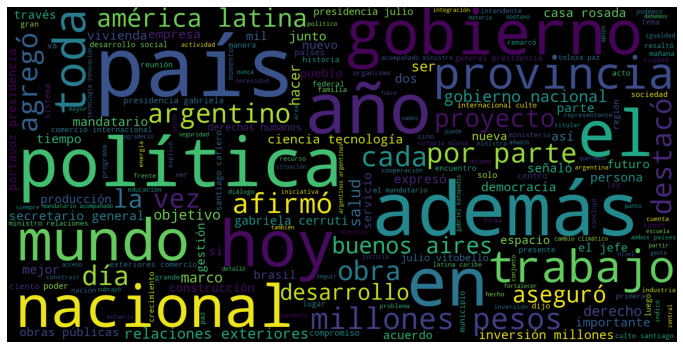

In [43]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, random_state=1, background_color="black").generate(words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Alternativa: Silueta en la nube

In [45]:
# Importing Libraries
from PIL import Image
import numpy as np

# Import image to np.array
mask1 = np.array(Image.open('comment.png'))

In [46]:
# Generate word cloud
wordcloud2 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="purple",
    colormap="Set2",
    mask=mask1
).generate(words)



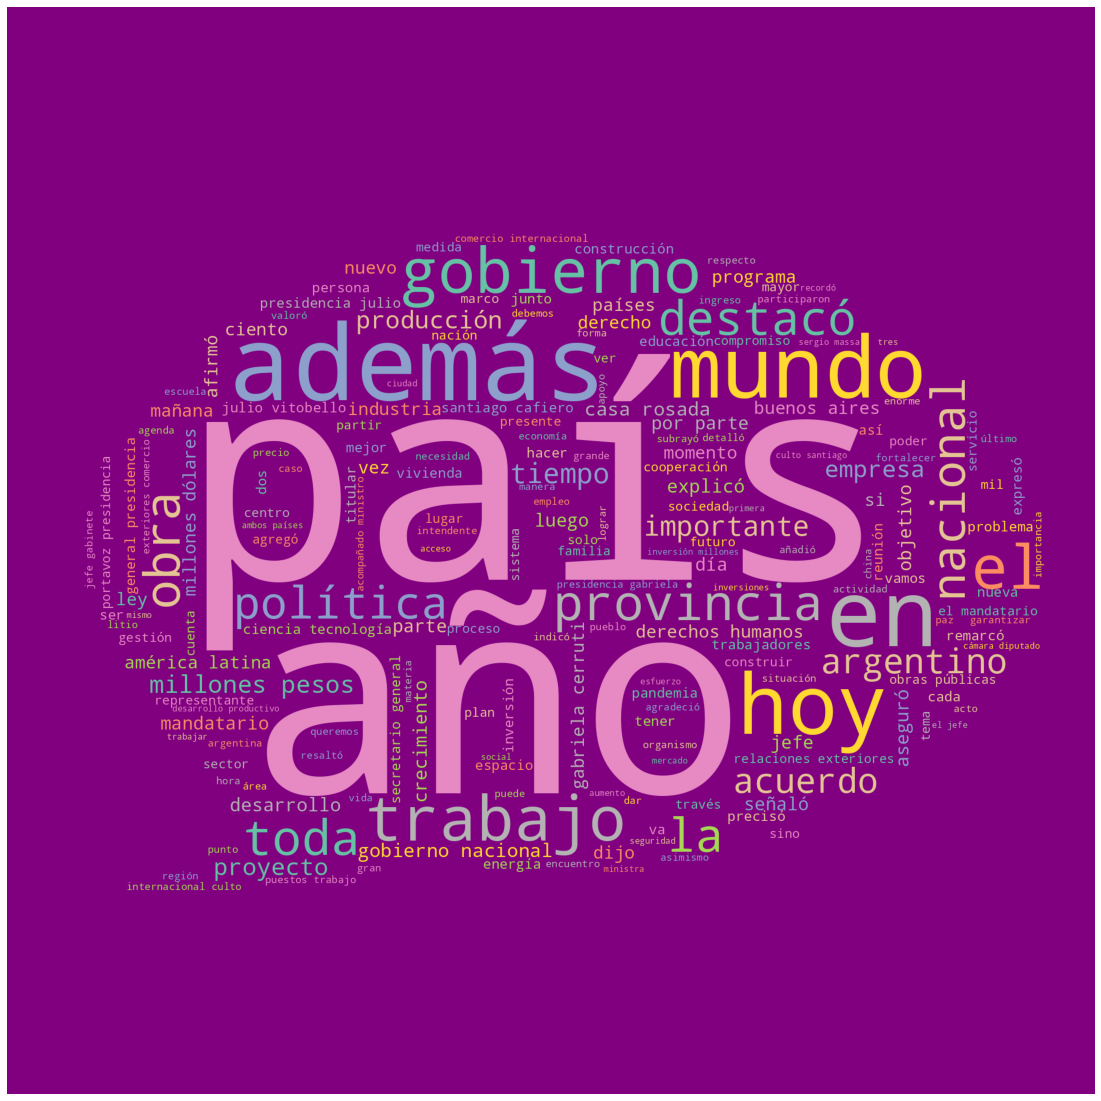

In [62]:
plt.figure(figsize=(24,20))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [63]:
wordcloud2.to_file('word_cloud_casa_rosada_silueta.png')

## Paquete ``newspaper``

[Documentación oficial](https://newspaper.readthedocs.io/en/latest/)

In [48]:
# !pip3 install newspaper3k

### Descagar un artículo

In [ ]:
from newspaper import Article
 
url = 'https://www.infobae.com/economia/2022/07/02/desde-la-escuela-secundaria-hasta-el-auge-y-la-caida-la-historia-de-los-dos-jovenes-que-fundaron-three-arrows-el-ultimo-terremoto-cripto/'
 
# download and parse article
article = Article(url)
article.download()
article.parse()
 

In [51]:
print(article.text)

Kyle Davies y Su Zhu recorrieron un largo camino. El lunes, la plataforma cripto que fundaron entró en liquidación en las Islas Vírgenes Británicas y ayer se presentó el pedido de quiebra en EEUU

El fondo de cobertura especializado en criptomonedas Three Arrows Capital, que el lunes pasado había entrado en liquidación, entró ayer en proceso de quiebra en EEUU, de modo que el fiscal designado pueda seguir el proceso de liquidación en su sede, en las Islas Vírgenes Británicas.

Three Arrows, conocido también como 3AC, era uno de los fondos de criptomonedas más conocidos, pero entró en un remolino de problemas debido al desplome de TerraUSD, una “stablecoin” algorítmica, y su proceso de liquidación se inició al no poder pagar USD 80 millones a otro fondo digital, Deribit.

La liquidación está a cargo de Teneo, una firma especializada en liquidaciones, que está evaluando qué activos tiene realmente 3AC y deberá luego crear un sitio web con instrucciones para los acreedores sobre cómo pone

In [67]:
article.text

'Kyle Davies y Su Zhu recorrieron un largo camino. El lunes, la plataforma cripto que fundaron entró en liquidación en las Islas Vírgenes Británicas y ayer se presentó el pedido de quiebra en EEUU\n\nEl fondo de cobertura especializado en criptomonedas Three Arrows Capital, que el lunes pasado había entrado en liquidación, entró ayer en proceso de quiebra en EEUU, de modo que el fiscal designado pueda seguir el proceso de liquidación en su sede, en las Islas Vírgenes Británicas.\n\nThree Arrows, conocido también como 3AC, era uno de los fondos de criptomonedas más conocidos, pero entró en un remolino de problemas debido al desplome de TerraUSD, una “stablecoin” algorítmica, y su proceso de liquidación se inició al no poder pagar USD 80 millones a otro fondo digital, Deribit.\n\nLa liquidación está a cargo de Teneo, una firma especializada en liquidaciones, que está evaluando qué activos tiene realmente 3AC y deberá luego crear un sitio web con instrucciones para los acreedores sobre có

### Obtener las imágines y videos de la noticias

In [55]:
#article.movies
# article.publish_date
# article.summary
article.images



''

### Obtener los enlases de un sitio

In [56]:
import newspaper
 
site = newspaper.build("https://www.clarin.com")  
 
# get list of article URLs
site.article_urls()

['https://www.clarin.com/economia/dolar-hoy-dolar-blue-vivo-cotiza-precio-2-junio-minuto-minuto_0_8BfZOlsFNG.html',
 'https://www.clarin.com/politica/elecciones-2023-vivo-vidal-tetaz-apoyaron-reclamo-mujer-irrumpio-gritos-acto-kicillof_0_7a4kM3tmD1.html',
 'https://www.clarin.com/politica/cristina-kirchner-delego-cierre-electoral-interna-hace-crujir-frente_0_Zt0rQ4psIJ.html',
 'https://www.clarin.com/economia/renuevan-swap-china-us-19-000-millones-amplian-us-10-000-millones-monto-libre-disponibilidad-_0_xURYMTCDzi.html',
 'https://www.clarin.com/politica/patricia-bullrich-cruzo-horacio-rodriguez-larreta-voy-frente-toma-decisiones-despues-arrepiente-_0_peRMGyCf03.html',
 'https://www.clarin.com/espectaculos/musica/taylor-swift-argentina-artista-anuncio-llegada-pais-recital-venta-entradas-_0_jGCDAocXVU.html',
 'https://www.clarin.com/policiales/juicio-sebastian-villa-viernes-conoce-veredicto-caso-violencia-genero_0_xKI64RzGyT.html',
 'https://www.clarin.com/sociedad/azafata-aerolineas-de

In [73]:
link_list = site.article_urls()

In [75]:
for link in link_list:
    article = Article(link)
    article.download()
    article.parse()
    print(article.text)

Info Comercial

Cierres Anticipados de Clasificados y Notables del Feriado del 7 y 10 de Octubre de 2022

Actualización Carga Órdenes Papel A partir del 14 de Septiembre quedaró implementada la nueva versión de carga de Órdenes… Ver Detalle Descargar

Olé La Scaloneta Un contenido original de Olé. Un ciclo de entrevistas inéditas y exclusivas. 7 capítulos de frecuencia… Ver Detalle Descargar
Cómo cocinar y en qué recetas usar lentejas, garbanzos, porotos y arvejas Las legumbres son saludables, nutritivas y económicas. Consejos para el remojo, la cocción y su uso creativo en platos deliciosos.

Si bien su consumo no es exclusivo del invierno, cuando el frío acecha las legumbres salen a la cancha. Ya sea en sopas, guisos, estofados o como guarniciones calentitas. También forman parte de dips e incluso se utilizan procesadas, como harina, en recetas de pastelería.

Las legumbres son los frutos de las plantas denominadas leguminosas que se cosechan dentro una vaina que encierra en su inter

Dos clásicos argentinos se combinan para armar un exquisito y tentador plato: la "Pizzanesa".

Ingredientes 150 g de carne vacuna en una lonja

150 g de carne vacuna en una lonja 3 huevos

3 huevos 1 cda de Savora

1 cda de Savora Ajo picado

Ajo picado Perejil picado

Perejil picado Panko o pan rallado, cantidad necesaria

Panko o pan rallado, cantidad necesaria 4 cucharadas de salsa de tomate

4 cucharadas de salsa de tomate 300 g de mozzarella

300 g de mozzarella 150 g de queso azul

150 g de queso azul Aceitunas verdes, a gusto

Aceitunas verdes, a gusto Hojas de albahaca fresca

Hojas de albahaca fresca Sal y pimienta, a gusto

Preparación

Paso 1

​​En un bowl, mezclar los huevos con la Savora, sal, pimienta, el ajo y el perejil picados.



Paso 2

Poner la carne en la mezcla y dejarla macerando en la heladera al menos por dos horas.

Paso 3

Apanar con panko o pan rallado y llevar al horno en una placa aceitada hasta que esté cocida y dorada.

Paso 4

Cubrir con salsa de tomate

El dólar soja aportó US$ 7.678 millones y el Banco Central compró el 65% de esas divisas Las ventas de los productores contribuyeron a reforzar las reservas. Sube el contado con liqui.

El dólar soja se despidió a toda orquesta con un aporte de US$ 647 millones en una sola rueda. Así, el esquema que rigió desde el 5 de septiembre y terminó este viernes aportó US$ 7.678 millones y ayudó a descomprimir momentáneamente la situación cambiaria.

Estos US$ 7.678 millones implican un 54% más de divisas que las que estaban previstas en el acuerdo original del Gobierno con el sector, que planteaba cerrar el mes en US$ 5.000 millones.

A lo largo del mes, el dólar soja le cambió la cara a las reservas del Banco Central. La entidad presidida por Miguel Pesce terminó la última rueda de la semana y del mes con compras por US$ 317 millones. En septiembre acumuló ingresos por US$ 4.968 millones, un monto equivalente al 65% de la liquidación de los sojeros.

Las compras del Central en el mes fueron ré

Margot Robbie está de incógnito en Buenos Aires y sus fans la descubrieron La noticia comenzó a correr esta tarde en redes sociales. Pero no había foto... hasta que horas después apareció una.

Tal como ocurrió hace casi dos semanas, con la presencia de Benedict Cumberbatch, ahora las redes sociales descubrieron la presencia de la australiana Margot Robbie en Buenos Aires, otra estrella de Hollywood.

¡¿Qué?! ¿Están por armar un crossover entre Marvel y DC Comic? Parece que no, que quien es el Doctor Strange en el Universo Cinematográfico de Marvel y la actriz que interpreta a Harley Quinn en las películas de DC vinieron a la Argentina simplemente en plan de visita. Cumberbatch, acompañando a su esposa, Sophie Hunter, que puso en escena en el teatro Colón dos óperas. ¿Y Margot?

Un tweet dio constancia de que la actriz que será Barbie en 2024 estaba realmente en el país, y se desató una competencia entre fans para ubicarla. Hasta ahora, sin resultado.

Margot Robbie en el Twitter de un

Insultos, denuncias cruzadas y la cuestión de la corrupción de modo dominante, marcaron con un tono furibundo el tercer y último debate entre los dos principales candidatos para las elecciones del próximo domingo, el mandatario Jair Bolsonaro que busca la reelección y el ex jefe de Estado, Luiz Inacio Lula da Silva.

Ambos se mostraron muy resueltos y con aparente preparación para el fuerte nivel de los choques. No era claro que hubiera un ganador al cierre de esta edición. El debate fue muy complicado. Hubo por momento discusiones intensas fuera del micrófono que se escuchaban por detrás del periodista que intentaba serenar a los postulantes.

“Mentiroso , ex presidiario, traidor a la patria”, le lanzó Bolsonaro en los primeros minutos a Lula da Silva y le exigió que “deje de mentir”. “Lo que está en juego en las elecciones es el futuro de la Nación. Brasil era una cleptocracia. Lula fue el jefe de una gran organización criminal. No podemos continuar en el país del robo”.

El ex presi

La Selección debutará contra Arabia Saudita en el mismo estadio donde se disputará la final. El partido inaugural será Senegal-Países Bajos.

La suerte está echada desde el 1° de abril, cuando se llevó a cabo el sorteo en Doha. Sin embargo, por aquellos días, todavía faltaban tres casilleros por completar en el fixture del Mundial de Qatar. Dos meses y medio después, todo está resuelto. Primero se metió Gales, que dejó afuera a Ucrania, para completar el Grupo B. Más tarde fue el turno de Australia, que sacó a Perú gracias a la atajada de su arquero bailarín en la definición por penales y participará en el Grupo D. Y el último ticket quedó en manos de Costa Rica, que se impuso en la pulseada contra Nueva Zelanda, que completará el Grupo E.

Fase de grupos Eliminatorias Octavos de Final Sábado, 3 de Diciembre de 2022 ... VS. ... ... VS. ... Domingo, 4 de Diciembre de 2022 ... VS. ... ... VS. ... Lunes, 5 de Diciembre de 2022 ... VS. ... ... VS. ... Martes, 6 de Diciembre de 2022 ... VS.

Horóscopo de hoy, viernes 30 de septiembre: las predicciones para la salud, el amor y el dinero Conocé qué dice el horóscopo hoy para los signos del zodiaco en este día de la semana.

Conocé signo por signo qué te depara tu horóscopo para este viernes 30 de septiembre de 2022.

Clarín te acerca las predicciones más precisas y los consejos más confiables de la astrología hoy para tu signo en cuestiones de salud, amor y dinero.

Horóscopo de hoy

Horóscopo de hoy: La actividad en la que te involucra dará un giro inesperado y con ello quedarás con expectativas que antes o no imaginabas.

Salud: Si tienes afecciones y ves que los doctores no dan con el problema que te causa esas dolencias es recomendable la medicina natural.

Amor: En lo posible trata de cuidar a quienes te quieren, ya que forma parte de la construcción de una vida intensa.

Dinero: Aunque creas que tienes razón pide consejo a algún asesor, te evitaras gastos por lo que sentirás grandes disgustos.

Horóscopo de hoy

Horósc

Pelea por los combustibles: Energía dice que aumentan, pero las petroleras lo niegan La suba de entre 1% y 4%a partir de este sábado fue confirmada por la secretaria de Energía, Flavia Royón. Pero en las petroleras no están seguros de que eso ocurra. Todo dependerá de YPF, donde evalúan absorber los costos.

Esta semana se habló mucho del descongelamiento de un impuesto al combustible y la duda estaba en su eso abriría la puerta a un nuevo aumento en los surtidores. La respuesta llegó de la mano de la secretaria de Energía, Flavia Royón, quien confirmó que desde el próximo sábado aumentan las naftas entre 1 y 4%, y que las estaciones de servicios ya recibieron la notificación.

Sin embargo, fuentes del sector petrolero, negaron a Clarín esa posibilidad. "No está claro que la principal operadora del sector vaya a realizar ese aumento", replicaron. La empresa es cuestión es YPF, donde no hacen comentarios.

Royón expreso que esta actualización del precio busca compensar un retraso. "No s

Presupuesto porteño 2023: la suba de Patentes tendrá un tope y no podrá superar la inflación acumulada Ese techo se mantendrá aunque la suba de las valuaciones de los autos supere a la inflación. El ABL se actualizará mes a mes.

El Ejecutivo porteño envió este viernes a la Legislatura el proyecto de Presupuesto 2023. Sus principales características son que apunta al déficit cero con reducción de la deuda pública y que prevé más inversión en Educación, Salud y Seguridad. Pero para el bolsillo de los porteños, lo más destacado es que la suba de las Patentes no superará la inflación acumulada aunque la valuación de los autos sí sea mayor.

Este Presupuesto es el último con la firma de Horacio Rodríguez Larreta como jefe de Gobierno. En el texto se define que el Estado porteño estima un total de gastos de 2.154.965 millones de pesos. Son más de dos billones, una cifra casi impronunciable que muestra el efecto de la devaluación de la moneda.

Además, y por tercer año consecutivo, el Presup

Nueva encuesta electoral: Javier Milei toca su récord y hay empate del Frente de Todos y Juntos por el Cambio Es un estudio nacional de Opinaia. Los últimos datos por espacio y por candidato.

Los números económicos -en particular la inflación-, más la feroz interna política harían presagiar una derrota del oficialismo en cualquier lugar del mundo. Pero la división opositora y la vigencia de la grieta parecen abrir un escenario de incertidumbre en la Argentina. Bastante de esto se refleja de cara a las elecciones 2023 en la última encuesta de Opinaia. Que deja dos datos centrales: Javier Milei toca su récord y hay empate entre el Frente de Todos y Juntos por el Cambio.

Opinaia es una consultora pionera en mediciones online y actualmente tiene entre sus clientes al Gobierno de la Ciudad. Entre el 12 y el 22 de septiembre hizo un relevamiento nacional de 2.000 casos, con +/- 2,2% de margen de error.

En la portada del informe, de 29 páginas, se resumen los tips centrales del estudio. Di

La razón por la que los alumnos en Provincia no toman escuelas pese a tener muchos déficits Los conflictos se canalizan a través de paros, marchas y "frazadazos". Afirman que los estudiantes están menos politizados.

Alumnos, docentes y padres de escuelas artísticas de la provincia marcharon en las últimas horas a la Dirección de Escuelas para reclamar por un presunto plan de “ajuste” que afectaría el dictado de cursadas en las escuelas artísticas instaladas en la jurisdicción.

Los manifestantes reprueban un plan oficial que impactaría sobre 110 establecimientos a los que asisten poco más de 23 mil niños y adolescentes que aprenden conceptos básicos de música, danza o actuación en establecimientos estatales y gratuitos.

Fue una protesta que adoptó el formato convencional de los reclamos por problemas en el sistema educativo bonaerense: movilización, carteles, corte de calles, concentración frente a una sede oficial.

Esa es la metodología que imponen los gremios, los estudiantes o in

Arabela Carreras denuncia que un funcionario de Nación "colabora ideológica y materialmente" con las tomas mapuches La gobernadora de Río Negro señaló al vicepresidente del Instituto Nacional de Asuntos Indígenas, Luis Alberto Pilquiman. También advirtió por falsos mapuches con domicilio en Buenos Aires.

Tras una semana marcada por la violencia mapuche en Villa Mascardi, la gobernadora de Río Negro, Arabela Carreras, sostuvo en un diálogo con Clarín que para frenar los ataques necesita más gendarmes y controles permanentes de las fuerzas nacionales en las rutas. Además apuntó contra un organismo del Gobierno nacional al que acusó de dar "señales confusas" sobre las tomas. Su queja recayó sobre las posturas del vicepresidente del Instituto Nacional de Asuntos Indígenas, Luis Alberto Pilquiman, al que le acusó de dar apoyo "ideológico y material" en las ocupaciones.

Antes, también había dicho que había falsos mapuches en la zona que tenían domicilios en Buenos Aires y otras provincias.

Guerra de relatores: por qué Fantino se peleó con Closs y Vignolo, y quién dictó su salida de ESPN El conductor disparó contra sus ahora ex compañeros pero el conflicto en realidad sería con uno de los hombres fuertes de la señal.

La polémica salida de Alejandro Fantino de ESPN, pegándoles a Mariano Closs y Sebastián Vignolo, hasta hace no mucho sus compañeros en el canal de Disney, generó reacciones encontradas y una mirada especial, la de Flavio Azzaro, el periodista deportivo que suele analizar en su canal de Youtube el lado B de los sucesos deportivos y los que rodean al gran circo del fútbol.

"Y sí, gente, a Fantino lo echaron de ESPN. Después de decir que le escupiría la cara a Closs y Vignolo, lo echaron de ESPN. Pero a Fantino ya lo habían sacado hace rato, lo habían corrido. El que lo margina no es ni Vignolo ni Closs, por más que Alejandro pueda plantearnos eso, quién puede creer que Vignolo y Closs sean los encargados de poner o sacar a un periodista como Fantino", empezó 

Sergio Massa destacó el "récord en liquidaciones y exportaciones" logrado con la implementación del dólar soja: "Nos da tranquilidad" El ministro de Economía se entusiasmó con los "resultados más que satisfactorios" de la medida.

Veinticinco días después del anuncio del dólar diferencial para liquidar la producción de soja, el ministro de Economía, Sergio Massa anunció que el Gobierno logró reforzar las reservas del Banco Central más de lo esperado con un total de US$ 7.646 millones, cuando esperaban alcanzar los US$ 5.000 millones.

"El número de cierre de la operación del complejo agroindustrial de septiembre es de U$S 8.123 millones de exportaciones argentinas que tienen un impacto directo en el ingreso de divisas y de reservas al BCRA. Al día de hoy, el total del ingreso declarado, pagado e incorporado a las operaciones del BCRA es de U$S 7646 millones, y hay un saldo que sigue ingresando en los próximos días hasta el martes", informó.

Y agregó más datos: "Tuvimos la participació

Condenaron a cuatro policías por torturar y asesinar a un joven de 20 años Diego Iván Pachao tenía 20 años en 2012, cuando fue detenido mientras intentaba frenar una pelea callejera. En la comisaría lo golpearon y murió dos días después.

Cuatro policías catamarqueños fueron condenados este viernes a penas de entre 2 y 16 años por las torturas que en marzo de 2012 sufrió un joven, quien murió días después por los golpes recibidos en su cabeza dentro de una comisaría.

El Tribunal de la Cámara Penal 2 de Catamarca le dio 16 años al oficial Gustavo Bulacios por los delitos de "privación ilegítima de la libertad y torturas" en perjuicio de Diego Iván Pachao (20).

Los jueces Silvio Martoccia, Fabricio Gershani Quesada y Rodrigo Morabito también condenaron a 8 años al oficial Ricardo Barrera por "torturas".

Diego Pachao (20) murió tras ser detenido en la comisaría séptima de Catamarca. Foto Facebook Silvia Véliz

Además, Ricardo Varela recibió 4 años de prisión por "torturas en calidad de

Dólares "cara chica": 5 formas de cambiarlos o gastarlos al 100% de su valor Los billetes más antiguos suelen ser rechazados o tomados a menor cotización, y los bancos no los cambian. Opciones para no perder.

Quienes guardan dólares "bajo el colchón" o en una caja de seguridad pueden llevarse una sorpresa desagradable el día que intenten utilizarlos. En la Argentina, si los billetes son de "cabeza chica", mucha gente se negará a recibirlos o sólo accederá a tomarlos a una cotización menor.

Los dólares que sufren esta discriminación son los que fueron emitidos durante casi todo el siglo XX, hasta 1996. Se los conoce como "cara chica" porque el rostro del prócer que está en el frente (Benjamin Franklin en el de US$ 100) aparece más pequeño que en las series más modernas.

La Reserva Federal de los Estados Unidos (equivalente a nuestro Banco Central) indica sin lugar a dudas que todos los dólares siguen vigentes y que valen lo mismo, sin importar su diseño ni si fueron impresos en 1920,

Lo denunciaron por abuso sexual y para huir de la policía se tiró a un dique de Puerto Madero: debieron rescatarlo Ocurrió en las inmediaciones de la UCA. Debió intervenir la Prefectura para sacar al acusado del agua.

Una llamativa fuga captó la atención de decenas de personas que se encontraban este viernes en Puerto Madero, donde un hombre se tiró al dique para escapar de la policía luego de que lo acusaran por abuso sexual.

El hecho ocurrió durante el mediodía en las inmediaciones de la Universidad Católica Argentina. Fue desde allí que la encargada del edificio San José, perteneciente al establecimiento educativo, realizó un llamado al 911 para denunciar que una persona la había manoseado.

Minutos después de haber alertado a las autoridades sobre el hecho, una patrulla de la Policía de la Ciudad arribó al lugar -ubicado en Alicia Moreau de Justo al 1600- y detuvo al sospechoso.

Se trataba de un hombre de 31 años cuya identidad no trascendió. Sin embargo, en el momento en el que

En un show en el Kremlin, Putin proclamó la anexión de zonas de Ucrania: "Las defenderemos con todos los medios" "Serán nuestros ciudadanos para siempre", dijo al oficializar la unión del 15% del territorio ucraniano.

En un gigantesco salón del Kremlin vestido de fiesta y a toda pompa, Vladimir Putin firmó este viernes la anexión de cuatro regiones ucranianas tras un discurso en el que instó a Kiev a "cesar inmediatamente las hostilidades" y a negociar.

Putin y los cuatro dirigentes de Lugansk, Donetsk, Jersón y Zaporiyia firmaron cada uno a su turno los documentos de anexión ante un público compuesto de miembros del gobierno, diputados y senadores y otros miembros de la élite política, antes de tomarse de la mano y corear al unísono "¡Rusia!" .

"Los habitantes de Lugansk y Donetsk, Jersón y Zaporiyia se convierten en nuestros ciudadanos para siempre", afirmó Putin. "La gente votó por nuestro futuro común", agregó.

Putin durante la ceremonia en el Kremlin. Foto: EFE

"Defenderemos 

Los dientes del chico de Stranger Things y su rara enfermedad, en una charla a solas con Clarín Entrevista exclusiva a Gaten Matarazzo, Dustin en la serie de Netflix, que estrenó "Honor Society" en Paramount+. Y habla de sus amigos.

A diferencia de Dustin, su personaje de Stranger Things, en Netflix, Gaten Matarazzo no parece tan atolondrado. Está en Nueva York, donde vive, y donde viven también muchos de sus compañeros de elenco de la serie. Ya nos contará sobre ello.

Amable en cada segundo de los minutos que concede esta entrevista vía Zoom, Matarazzo es otro de los intérpretes de Stranger Things que se prueba en otro tipo de géneros. Así como Millie Bobby Brown ya hasta produce sus películas (se viene la secuela de Enola Holmes en noviembre), y Finn Wolfhard saltó al drama en El jilguero -no cuenta la nueva de Los cazafantasmas, porque en algo se parece a ST-, él saltó a la comedia romántica.

En Honor Society, que acaba de estrenar Paramount+, es el coprotagonista masculino. Hono

El gobierno le adjudicó una radio a Luis D'Elía Es la AM 1570. Se la dieron a la cooperativa Radio Rebelde, que preside el dirigente K. Planea retransmitir la programación de la AM740, que nunca pudo legalizar.

El Ente Nacional de Comunicaciones (ENaCom) otorgó la frecuencia de la AM1570 a la cooperativa Radio Rebelde, que preside Luis D'Elía, el dirigente piquetero muy cercano al presidente Alberto Fernández, con el voto a favor de los directores kirchneristas y el voto en contra de los dos directores parlamentarios por la oposición.

Luis D'Elía fue beneficiado por los directores del ENaCom alineados con el Gobierno, ya que su cooperativa presentó una carpeta técnica y una propuesta económica con "inconsistencias", según alertaron los directores opositores Silvana Giudici y José Corral, pese a lo cual el organismo oficial avanzó con la adjudicación de la licencia en la localidad de Lomas de Zamora.

En diálogo con Clarín, D'Elía se mostró satisfecho por la adjudicación, porque les p

La curiosa historia detrás de El hombre del rifle, la serie que cumple 64 años Estrenada el 30 de septiembre del '58, fue protagonizada por Chuck Connors, un ex jugador de béisbol y de la NBA. Las perlitas del western.

Más de uno se debe haber levantado del sillón para ir a darle un golpecito al televisor. En tiempos de blanco y negro, era habitual que la imagen saltara y el “vertical/horizontal” del aparato enloqueciera. Y ahí venía, entonces, la solución casera. Pero esa toma, con la cámara en la cintura, enfocando un cuerpo sin cabeza, no era una falla. Era la rupturista apertura de El hombre del rifle, la serie que hoy cumple 64 años.

El western protagonizado por Chuck Connors, estrenado por la cadena ABC el 30 de septiembre de 1958, estuvo cinco temporadas consecutivas en pantalla y le abrió el camino a varias historias de molde similar, hacia fines de los '50 y comienzos de los '60, en lo que fue un verdadero furor de las series. Porque hubo una vida antes de Netflix.

La histo

Video: colapsó el techo de una tribuna del estadio de Colo Colo que estaba colmada de hinchas Bomberos chilenos trabajan en el lugar para rescatar y atender a los heridos.

El techo de una tribuna del estadio Colo Colo de Chile colapsó este viernes mientras miles de hinchas realizaban un banderazo previo al clásico con la Universidad Católica.

Bomberos y personal de salud trabajan en el lugar para rescate y atención de los heridos.

Según se ve en los videos, el colapso se produjo cuando varios hinchas de subieron a una estructura metálica que sostenía un cartel de publicidad.

Los medios locales destacaron que los fanáticos hicieron colapsar el techo de la tribuna cordillera, el cual cedió y, de momento, dejó ocho heridos, según reportó Carabineros, aunque el número podría ir en aumento.

Según informó el diario La Tercera, hay "ocho heridos y dos fracturados en el Arengazo albo en la tribuna Cordillera".

En el periódico La Cuarta, en tanto, aclararon que "ninguna de las personas af

53 / 80

Una modelo presenta una creación de la diseñadora Maria Grazia Chiuri como parte de su desfile de la colección Primavera-Verano 2023 de prêt-à-porter femenino para la casa de moda Dior durante la Semana de la Moda de París, Francia, el 27 de septiembre de 2022. REUTERS/Johanna Geron
La China Suárez relató una increíble anécdota sobre una experiencia paranormal que vivió en su casa Invitada al exitoso programa El Hormiguero en España, la actriz reveló que "Salté en bombacha por la ventana de un primer piso".

A pocos días de desembarcar en España, donde viajó para promocionar la película Objetos que protagoniza junto a Álvaro Morte y Verónica Echegui antes de que se estrene en las salas de cine de todo el país, Eugenia La China Suárez visitó El Hormiguero, uno de los programas más populares de la televisión local.

El ciclo conducido por Pablo Motos se caracteriza entre otras cosas por lograr que los artistas que van de invitados terminen contando historias de su vida que hasta

Tremenda amenaza de Tamara Báez hacia L-Gante y su entorno: "Cosas para mostrar tengo miles así que piensen bien" La exnovia del cantante publicó un fuerte descargo en sus redes tras denunciarlo en la Justicia.

La escandalosa separación de L-Gante y Tamara Báez sumó un nuevo capítulo en las últimas horas cuando la exmujer del cantante compartió un furibundo descargo en sus historias de Instagram.

En detalle, la mamá de Jamaica, la única hija en común de la ahora expareja, explotó de bronca al escuchar al abogado de su ex, por Alejandro Cipolla, hablar de su escandalosa separación.

Luego de que trascendiera que ella había denunciado al cantante por "violencia familiar, económica, patrimonial, acoso, amenazas y hostigamiento", el letrado brindó una entrevista en los medios y dio detalles de la causa en cuestión.

Las declaraciones de Cipolla, así como otras que dio la mamá del artista, por Claudia Valenzuela, enfurecieron a la joven de 22 años, quien no dudó en salir a contar su verda

Una familia asesinada, la sombra de la mafia china y el miedo que empujó a dos chicos hasta ser campeones del mundo Yu Ying Yen, su mujer y sus dos niños fueron encontrados muertos en junio de 1992. Su discípulo y maestro de Kung Fu, Horacio Brest, entrenó a sus hijos por temor. Ellos se convirtieron en deportistas de elite.

La primera noche en su nueva casa, la sangre todavía formaba dibujos en las paredes. Imposible limpiarla. “Una casa entera llena de sangre”, le había dicho Horacio Brest a su esposa esa mañana, cuando sacaron a la calle todo lo que había adentro. Horacio cerró con llave las habitaciones y amontonó unos colchones en el comedor. Los gemelos Gastón y Gonzalo, de 5 años, se acostaron junto a su madre. Él se quedó despierto. Los ruidos se le aparecieron como puertas que se abrían y pasos acercándose. Al amanecer salió a la calle. Miró el cielo despejado y lo acechó una idea sombría: “Capaz vuelvo y los encuentro a todos muertos”.

-Casi un año dormimos acá, los cuatro 

Cambios en el ánimo y falta de energía: ¿existe la astenia primaveral? La astenia existe y está bien definida, pero su vínculo con esta etapa del año es eje de controversias.

Una buena noticia para la mayoría puede representar un trastorno para otros.

La llegada de la primavera, con sus días soleados, sus jornadas más largas -que implican un mayor nivel de actividades-, y el cambio en los hábitos alimenticios y de sueño; no impacta igual en todas las personas.

De hecho, quienes de alguna manera "padecen" la llegada de esta estación notan diversos cambios en su ánimo y sus niveles de energía.

¿Existe la astenia primaveral?​



El término "astenia primaveral" no está exento de controversia.

No solamente porque hay quienes niegan que exista una influencia negativa de esta época en algunas personas, sino por que la palabra "astenia" es un término asociado a una enfermedad. No sería el caso de este síndrome, encuadrado dentro de los trastornos afectivos estacionales.

En este sentido, 

Falta de neumáticos: ¿es legal ir a cambiarlos a un país vecino? Ante la escasez de cubiertas y los sobreprecios muchos van a comprarlas a Chile, Uruguay, Brasil, Paraguay o Bolivia. Qué pasa en la Aduana.

Reemplazar neumáticos deteriorados o que fueron robados en la vía pública se volvió una pesadilla en la Argentina, al agudizarse los faltantes de cubiertas y los sobreprecios en las pocas que se ofrecen.

Frente a esta situación -derivada de las trabas a la importación y un grave conflicto gremial que paraliza la producción local-, muchos automovilistas están yendo en busca de ruedas a los países limítrofes, donde el abastecimiento y los precios son los habituales.

La maniobra creciente consiste en cruzar con el vehículo a Uruguay, Brasil, Chile, Paraguay o Bolivia, pedir en una gomería extranjera el reemplazo de uno o más neumáticos, pagarlos en efectivo o con tarjeta, y regresar a la Argentina.

¿Pero qué ocurre cuando toca pasar por la Aduana? ¿Es legal volver al país con cubier

Clarín habló con varias generaciones de coleccionistas, que cuentan los secretos de un hobby que lleva 50 años. Las más difíciles de la historia y un viaje por los Mundiales.

–Luis, ¿qué hacés juntando figuritas con sesenta y pico de años? Parecés un nene...

–Es una pasión, Ernesto. Es algo inexplicable, es como mi terapia. Yo me la gasto en figuritas... vos en psicoanálisis.

Está claro que a Luis no le importa el qué dirán, ni mucho menos la mirada del otro. Es un coleccionista que lleva en la actividad más de 30 años y su casa habla por sí sola: es un museo de álbumes y figuritas de todo tipo, forma y color, pero especialmente de fútbol.

"Calculo que debo tener un millón", dice como si nada Luis Digiano (63), periodista, amante de los partidos: "Veo todo y más. Disfruto Riestra vs. Sacachispas tanto como Liverpool vs Manchester City".

"Es mi terapia", dice Luis Digiano coleccionista de figuritas mostrando aquí uno de sus mayores tesoros, el álbum del Mundial USA 94. Foto: Lucía 

Este año, se volvieron a habilitar los permisos. Para algunas provincias, la práctica es una gran fuente de ingresos. Pero hay cuestionamientos de los ambientalistas e incluso de los propios cazadores.

Un sábado por la mañana, en la ciudad de Coronel Suárez, a unas seis horas de la Capital Federal, Juan Manuel carga una escopeta con cartuchos en la caja de la camioneta, y comienza a alejarse de la estancia antigua en la que pasó la noche. Con un cielo nublado y una ventisca, que se hace sentir fuerte en medio de las 30 hectáreas de campo, está a punto de salir de caza después de dos años.

“A la mayoría de nosotros no nos importa cazar sino estar cazando, salir a desayunar por el campo, caminar horas, buscar el animal, hacer un 'stop' y preparar un asado, y volver a la búsqueda”, relata el cazador amateur.

En mayo, el Ministerio de Desarrollo Agrario bonaerense habilitó la temporada de caza deportiva en la provincia, luego de dos años limitada a causa de la pandemia de Covid-19. Grad

El objetivo de la ley de 2010 era "desmanicomializar" la salud pública. Qué dicen los expertos y cómo lo viven las víctimas.

“¡¿Que en qué situación está él ahora?! ¡Muerto!”. Julia arrancó hablando del incumplimiento de la ley de Salud Mental de 2010 y terminó con esta sentencia: “¡Muerto! Mi hermano estaba muy enfermo. En el Borda me decían 'solo no puede estar', pero no podía llevarlo a vivir conmigo. Yo le tenía miedo. Temía por mi vida”.

En el imaginario social, sobran las historias de terror ligadas al tratamiento de la salud mental. Los manicomios inmirables. La farmacología al servicio de la inhumanidad. Los pacientes en internaciones vitalicias.



Doce mil, encontró el censo nacional del sector que (en cumplimiento de la ley, pero con seis años de demora) las relevó en 2019. Promedio de internación: 8 años. Promedio de internación en instituciones públicas: 12 años.

Por los abusos y para estar en sintonía con tendencias internacionales más modernas, en 2010 se sancionó una

Boca: Sebastián Villa se pone a punto y el Negro Ibarra hace cuentas pensando en su vuelta Tras ser operado de su rodilla, el colombiano comenzó su recuperación y su posible regreso sería fundamental para el equipo.

El cierre de la temporada comienza para Boca. Y en un calendario más que ajustado, con todo en disputa, es el momento de administrar el físico de un plantel dañado por la competencia (sin pretemporada a mitad de año por ser campeón de la Copa de la Liga) y que no tendrá descanso hasta el Mundial de Qatar. En ese escenario, en el Boca Predio de Ezeiza comenzó la recuperación de un futbolista que fue decisivo: Sebastián Villa.

El colombiano cumplirá el domingo un mes desde su operación en el menisco externo de la rodilla derecha y ya inició trabajos en el campo de juego, algo que está dentro de los plazos previstos y que complementó las tareas que estaba haciendo el cafetero en el gimnasio. Los días de trabajo se van a ir acumulando y de acuerdo a lo pautado, el delantero (

Murió Luis Quiñones, el boxeador colombiano que agonizó cinco días tras recibir una paliza sobre el ring Tenía 25 años y había quedado en coma después haber sufrido severas lesiones en un combate de boxeo. El dolor de la familia y de su rival.

El boxeo está de luto. El colombiano Luis Quiñones, de apenas 25 años, murió en la madrugada de este viernes después de permanecer cinco días en coma como consecuencia de las lesiones sufridas en un combate disputado el pasado sábado contra su compatriota José Muñoz, en la ciudad de Barranquilla. Leonardo, hermano del deportista, confirmó el fallecimiento a través de sus redes sociales. Y desde la Federación Colombiana de Boxeo lamentaron la pérdida de una de las mayores promesas del boxeo latinoamericano. Todo un país se lamenta por su fallecimiento.



Quiñones había peleado contra Muñoz en el Coliseo Elías Chewgin el pasado sábado por el título nacional welter junior. El combate terminó por la vía rápida en el octavo round.

El boxeador colom

El regreso de Mercedes y la amenaza de Ferrari: ¿dos tanques que se interponen entre Verstappen y el título en Singapur? El neerlandés Verstappen, que puede ser bicampeón de la Fórmula 1 este domingo, no pudo hacer el mejor tiempo en ninguno de los entrenamientos del viernes.

El Gran Premio de Singapur, el primero que se corrió de noche en la Fórmula 1 allá por 2008, regresó tras tres años de ausencia y con una máxima sorpresa: en el circuito de Marina Bay, Max Verstappen no pudo hacer el mejor tiempo en ninguno de los entrenamientos del viernes, pese a que es el gran candidato por su diferencia de 116 puntos en la cima del campeonato que le da chances matemáticas para convertirse en bicampeón este domingo.

La primera práctica del viernes se disputó en condiciones especiales: de día, algo que no se repitió en la segunda ni en la clasificación del sábado a las 10 como tampoco en la carrera del domingo a las 9 (por Star+). La primera tuvo un vencedor inesperado: Lewis Hamilton, quien a

Cristina Kirchner pasó del silencio a los reclamos y le achica el margen de maniobra a Sergio Massa El pedido de más controles a las alimenticias golpea el discurso amigable que busca desplegar el Ministro ante los empresarios. Más gasto para financiar planes sociales.

La vicepresidenta dejó de hablar por un rato de las cuestiones judiciales que la aquejan y preocupan y retomó la cuestión económica, de la que se había mantenido a distancia prudencial desde que Sergio Massa asumió como ministro de Economía, a principios de agosto.

En un rol que no le disgusta, el de “comentadora” de la actualidad, pretendidamente ajena a las responsabilidades de Gobierno, Cristina Kirchner se ocupó de señalarle a Massa lo que ella espera de ahora en más de la gestión económica: lo hizo en el tercero de los tuits que publicó el miércoles a la noche, pocas horas después de conocerse el informe del INDEC que informó los niveles de pobreza (36,5%) e indigencia (8,8%).

“El ministerio de Economía ha trabaj

Tras el acuerdo de los neumáticos, Toyota y Ford reanudan su producción Estuvieron suspendidas la mayor parte de la semana, con la pérdida de más de 3.000 unidades. Toyota había ingresado anoche un cargamento de cubiertas importadas desde Brasil. Ford retoma esta tarde.

El efecto inmediato del acuerdo entre el Sindicato Único del Neumático (SUTNA) y las empresas fabricantes ya repercutió puertas adentro de las automotrices. Tanto Toyota como Ford retoman sus tareas este viernes, tras haber estado paralizadas la mayor parte de la semana y haber perdido la producción de unas 3.000 pick ups.

Toyota retomó el viernes por la mañana. Ya tenía previsto hacerlo desde el día anterior, cuando en la planta de Zárate recibieron un cargamento de cubiertas importadas desde Brasil.

"Informamos que se ha logrado el abastecimiento de neumáticos para producir en forma normal y habitual desde mañana viernes 30/9 en ambos turnos", dice una nota interna emitida anoche.

El acuerdo de las fabricantes loc

Cómo hacer que la batería del teléfono celular dure más: todos los secretos Tips, consejos y recomendaciones para alargar la vida útil de la batería del smartphone. Mirá el video.

La batería del teléfono celular es un componente crítico. De hecho, suele ser la causa principal a la hora de cambiar el dispositivo: de durar un día y medio, con el paso del tiempo, hay usuarios que reportan que les dura media hora. Si bien hay un ciclo vital para ellas, estimado entre 3 y 5 años según el uso, hay ciertos hábitos que las pueden dañar fuertemente.



Hay algunos mitos que quedaron vigentes y todavía se arrastran. Por ejemplo, la idea de que hay que descargar casi completamente la batería para recargarla, algo que, de hecho, juega en contra. El ciclo de la batería, compuesta de iones de litio, se ve afectado si va del 1% al 100% con frecuencia y hasta le quita una parte de la vida útil de la batería.

Tanto en iPhone como Android, lo cierto es que en la actualidad este tipo de prácticas arrui

Tríos, voyeurismo y más: cómo compartir y disfrutar las fantasías sexuales con tu pareja La comunicación asertiva es clave para poder llevar las fantasías a la realidad. Cuáles son las más frecuentes.

Las fantasías sexuales pueden quedar en el plano de la imaginación o bien hacerse realidad. En pareja, por separado, individual o grupalmente, como protagonistas o espectadores, numerosas son las formas en que se presenta el deseo.

Contra todo pronóstico, a veces la fantasía pasa por el sexo romántico. Tríos, voyeurismo, dominación o swingerismo son otras de las más frecuentes. Y mientras que algunas personas prefieren dejarlas en el plano mental, otras se animan a experimentarlas.

Según una encuesta entre 16.450 usuarios de Gleeden Argentina, aplicación de encuentros extraconyugales, el 67% logró llevar a cabo al menos una de sus fantasías sexuales. El 60% afirmó haber tenido algún tipo de fetiche y el 47% de los consultados dijo estar dispuesto a realizar un intercambio de parejas. D

Qué diferencias hay entre bienestar y calidad de vida y cuál es el camino para alcanzarlos Definiciones desde la psicología y la mirada desde las prácticas contemplativas.

Pasó recientemente la semana del bienestar. La Organización Panamericana de la Salud/Organización Mundial de la Salud (OPS/OMS) y del Foro Económico Mundial son las organizaciones promotoras de esta iniciativa, que busca desarrollar un movimiento social que promueva las acciones para una vida saludable y que llame la atención sobre el problema entre las personas, los hacedores de políticas, las comunidades y los empleadores.

El concepto de bienestar no es sencillo de definir, pues existen muchas maneras de verlo.

Bienestar: en busca de una definición

Los autores Richard Lucas, Ed Diener y Eunkook Suh consideran el bienestar compuesto por tres factores: satisfacción con la vida, afecto positivo y afecto negativo y ha sido sido confirmado en numerosos estudios.

Refleja la evaluación que la persona hace de su vida 

Se suicidó a los 14 años: ahora la Justicia expuso lo que vio en las redes sociales antes de la trágica decisión Los jueces apuntan a los contenidos: "Nunca debieron estar accesibles para una niña".

La justicia británica cuestionó este viernes el papel de los contenidos que vio una adolescente en las redes sociales antes de suicidarse, tras un proceso que relanza el debate sobre la influencia de estas plataformas y sus algoritmos.

Molly Russell, que sufría de depresión, se suicidó en noviembre de 2017 cuando tenía 14 años.

Sus familiares descubrieron que había sido expuesta en las redes sociales, principalmente Instagram y Pinterest, a numerosos contenidos que evocaban el suicidio, la depresión y la autolesión.

Desde niña Molly Russell venía sufriendo depresión. En 2017 se quitó la vida.

Un procedimiento judicial llamado Inquest, destinado a determinar las causas de su muerte, llegó a esta conclusión el viernes en Londres, después de diez días de audiencia.

Los contenidos que vio

El niño que fue vendido por su padre y criado durante 12 años por una manada de lobos Tenía 7 años cuando su padre lo abandonó y debió sobrevivir en un bosque.

La historia de Marcos Rodríguez Pantoja es, por decirlo de alguna manera, extraordinaria. Si entendemos como extraordinario vivir 12 años con una manada de lobos. Pasó su infancia y adolescencia entre animales y viviendo en forma primitiva en Sierra Morena, España.

A Marcos e lo puede definir como un niño salvaje, ya que pasó gran parte de su infancia fuera de la sociedad. Y hasta podemos relacionarlo con el mítico personaje de ficción Tarzán, o la leyenda de Rómulo y Remo, los hermanos fundadores de Roma, amamantados por una loba. Pero éste es un caso real.

Marcos Rodríguez Pantoja nació el 7 de junio de 1946 en Añora, provincia de Córdoba, España. Emigró de muy pequeño junto a su familia a la capital, Madrid. Su madre falleció cuando él tenía 3 años, al poco tiempo de dar a luz a su octavo hijo. Su padre se volvió a casar, 

“Mi hijo era hermoso, siempre estaba contento. Era un nene lleno de luz”. Así describe Eva “Fátima” Díaz a su hijo Ciro Galván, que con tan solo tres años fue víctima de un homicidio vial el 13 de mayo de 2021 en Dock Sud.

Al día de hoy, la familia de Ciro sigue exigiendo justicia y espera la elevación de la causa a juicio oral. Por eso, Fátima recibió a Clarín en su casa y habló de aquel momento que cambió su vida para siempre.

Eva "Fátima" Díaz exige justicia por la muerte de su hijo. Foto: Matías Arrascoyta.

“Ese día estábamos jugando con mis hijos en la plaza que está frente a mi casa. Ciro empezó a insistir con que se quería lavar las manos, así que decidimos cruzar. Yo iba con mi beba en brazos. Pero él me soltó la mano”, recuerda la madre, entre lágrimas.

En ese instante el auto conducido por Jonathan Autón pasó a alta velocidad y atropelló al menor. El imputado se fugó e hizo una falsa denuncia por el robo de su auto porque tenía antecedentes penales.

El auto que atropelló

Escobar ya vive la Fiesta Nacional de la Flor, un paseo ideal para hacer miniturismo Escobar se ve revolucionada ante la exposición de floricultura más grande de América Latina. Habrá cientos de expositores y miles de visitantes de todo el país.

Brand Studio para Municipalidad de Escobar

Del 30 de septiembre al 10 de octubre tiene lugar la 59ª Fiesta Nacional de la Flor en Escobar, el evento de floricultura más grande de Latinoamérica, que cada año convoca a miles de visitantes de distintas ciudades del país.

En el renovado Predio Floral, se encuentran más de 100 expositores y viveros. Allí se pueden comprar flores y plantas de productores locales y de otras provincias, disfrutar de espectáculos culturales y las nuevas atracciones como las instalaciones con flores gigantes, un túnel inmersivo, talleres culturales, tattoos, cabinas de fotos, un parque aéreo y una plaza blanda para los más chicos.

En el renovado Predio Floral, se encuentran más de 100 expositores y viveros.

También 

Los últimos días de una ciudad australiana donde cada aliento puede ser tóxico A pesar de su historia mortal, los visitantes continúan viajando al pueblo fantasma de Wittenoom.

WITTENOOM, Australia — Sentado en un techo en un pueblo fantasma en medio del interior de Australia, Mario Hartmann esperó a que llegaran las excavadoras.

Subía todos los días porque era el único lugar donde había señal de Internet.

Con el pueblo más cercano a una hora y media de distancia, sabía que debía tener cuidado.

Alguna vez un símbolo de prosperidad económica, Wittenoom, Australia, ahora es un pueblo fantasma, contaminado por décadas de minería de asbesto. Foto Matthew Abbott para The New York Times

“Voy, solo puedes tomar 15 cervezas”, dijo.

“Más de 15 cervezas, aquí no subes”.

Pero riesgos mucho peores acechan a esta ciudad.

En el patio de abajo, el perro pastor australiano de Hartmann correteaba detrás de una pelota, levantando nubes de polvo con una amenaza invisible:

asbesto azul.

Solo una

Guerra en Ucrania: Putin intensifica su pulseada con Occidente No hay señales de que ningún otro país reconocería el movimiento de Rusia, pero Putin puede intentar usar los planes para desviar la atención de sus pérdidas en el campo de batalla.

El presidente Vladimir Putin llevó a cabo su amenaza el viernes de declarar que más de 10 millones de hectáreas del este y sur de Ucrania se convertirán en parte de Rusia, una anexión ilegal denunciada por Occidente, pero una señal de que el líder ruso está preparado para aumentar las apuestas en la guerra de 7 meses contra Ucrania.

No está claro si incluso los aliados más acérrimos de Rusia reconocerán el movimiento de Putin, y las fuerzas rusas solo controlan parcialmente la tierra que planea reclamar.

Vladimir V. Putin asistiendo a una conferencia de jefes de agencias de seguridad e inteligencia de los países miembros de la Comunidad de Estados Independientes a través de un enlace de video en Moscú, el jueves Foto Gavriil Grigorov/Sputnik,

Oktoberfest: la mayor fiesta de la cerveza llega al conurbano con las variedades alemanas más ricas El desembarco de una tradición que se hizo mundial es este fin de semana en Avellaneda. Y el siguiente hay otro en la zona Oeste.

El tradicional Oktoberfest, la fiesta de origen alemán que le rinde culto a la cerveza, llega al Conurbano bonaerense. Este primer fin de semana de octubre se realiza en la zona Sur y, una semana después, se repite en el Oeste.

Entre los dos eventos, 25 productores locales ofrecerán las variedades más habituales de la cerveza artesanal que se hacen en la Argentina, pero además harán foco en los estilos típicos del país en el que se inició la tradición de esta fiesta birrera.

La primera cita es en ​Avellaneda, En el

Parque Municipal Multipropósito La Estación, ubicado en la avenida Güemes al 700, frente al Alto Avellaneda Shopping, 15 productores ofrecerán ocho estilos icónicos de cerveza alemana. Se podrá concurrir el sábado desde las 15 hasta la medianoch

El reencuentro viral de Casi Ángeles: el video que reunió a Gimena Accardi, Nicolás Vázquez y Emilia Attias Fueron homenajeados en la escuela artística que dirige Cris Morena en Martínez. Mirá el video del reencuentro que causó furor en redes.

No hay dudas que Casi Ángeles fue una de las tiras juveniles mas exitosas que tuvo Telefé. Si bien el último episodio se emitió hace casi doce años, los fanáticos -al día de hoy- le guardan un enorme cariño al programa que logró conquistar la televisión local e internacional y unir generaciones. Por esta razón, cada vez que el nombre de la novela reaparece en la esfera pública, una marea de nostálgicos la recuerda y se ilusiona con un posible regreso.

Días atrás, un reencuentro despertó la emoción de los admiradores. Fue cuando Emilia Attias, Nicolás Vazquez y Gimena Accardi, tres de los protagonistas de la ficción, fueron homenajeados en "Otro Mundo", el semillero de talentos que lleva la firma de Cris Morena, ubicado en la localidad de Martín




















Comprar ahora

Referencia producto n° # P080933

Le 9 de Givenchy, auténtico objeto de Alta Costura, se presenta en diferentes combinaciones cromáticas, compuestas todas ellas por sofisticados tonos nude, así como por tonos intensos y atrevidos. Cada paleta cuenta con nueve sombras de ojos de acabados mate, satinado, brillante y metálico para crear multitud de looks, desde los más naturales a los más sofisticados.

Su textura, ultrasensorial y altamente pigmentada, garantiza una duración de 12 horas* para un resultado infalible durante todo el día.

Ver más







Descripción

¡El precio de la publicación YA INCLUYE EL ENVÍO! a todo el país excepto a Tierra del Fuego.



____________________________________________



Una guía para disfrutar del café más rico en las mejores tazas VOLF, y también una forma de reconocerle a esta maravillosa infusión el lugar que ocupa en la tradición argentina. En esta obra se exploran los secretos del café, con sus variedades y caract

Un informe oficial detalla cuántos empleados hay en la Administración Pública Nacional y en las empresas del Estado Se elaboró en base a la información aportada, bajo declaración jurada, por 149 dependencias oficiales. Se actualizará mensualmente.

La Administración Pública Nacional (APN) contaba en julio de este año con una dotación de 341.681 empleados. El dato lo informó esta tarde el INDEC, en el primer informe sobre Dotación de personal de la administración pública nacional, empresas y sociedades.

En verdad el primer informe arranca con dos datos. Según el INDEC, los 341.681 empleados de julio surgen de la información entregada por 149 áreas de gobierno, mientras que en agosto, con datos aportados por 145 áreas, la dotación total cae a 323.372 empleados. Se infiere que el de julio es el informe más completo y por lo tanto el que se tomó de base para este artículo.

Cómo se reparte el empleo público nacional.

En Jefatura de Gabinete explicaron que la diferencia de áreas informant

Mauricio Macri reveló qué posición tomará si Horacio Rodriguez Larreta y Patricia Bullrich son candidatos a presidente El expresidente está en España, donde participó en un foro junto a otros dirigentes y aseguró que "el populismo en Argentina se acabó".

El expresidente Mauricio Macri reveló en las últimas horas qué posición tomará si Horacio Rodríguez Larreta y Patricia Bullrich se presentan como precandidatos de Juntos por el Cambio en las elecciones presidenciales de 2023.

En una entrevista con el diario ABC de España, y ante la pregunta de a cuál de los dos apoyaría, el ex mandatario respondió: "Mi trabajo es hoy ayudarlos a crecer, y si veo que al final del camino uno garantiza el cambio y otro no, yo voy a jugar. Si no estoy seguro que hay una marcada diferencia no voy a pedir el voto por uno, creo en la sabiduría de la gente".

"Los veo muy bien a los dos, veo una evolución permanente; el camino a ser presidente no es de un día para el otro, es un proceso en el que se va madur

La razón por la que los alumnos en Provincia no toman escuelas pese a tener muchos déficits Los conflictos se canalizan a través de paros, marchas y "frazadazos". Afirman que los estudiantes están menos politizados.

Alumnos, docentes y padres de escuelas artísticas de la provincia marcharon en las últimas horas a la Dirección de Escuelas para reclamar por un presunto plan de “ajuste” que afectaría el dictado de cursadas en las escuelas artísticas instaladas en la jurisdicción.

Los manifestantes reprueban un plan oficial que impactaría sobre 110 establecimientos a los que asisten poco más de 23 mil niños y adolescentes que aprenden conceptos básicos de música, danza o actuación en establecimientos estatales y gratuitos.

Fue una protesta que adoptó el formato convencional de los reclamos por problemas en el sistema educativo bonaerense: movilización, carteles, corte de calles, concentración frente a una sede oficial.

Esa es la metodología que imponen los gremios, los estudiantes o in

Arabela Carreras denuncia que un funcionario de Nación "colabora ideológica y materialmente" con las tomas mapuches La gobernadora de Río Negro señaló al vicepresidente del Instituto Nacional de Asuntos Indígenas, Luis Alberto Pilquiman. También advirtió por falsos mapuches con domicilio en Buenos Aires.

Tras una semana marcada por la violencia mapuche en Villa Mascardi, la gobernadora de Río Negro, Arabela Carreras, sostuvo en un diálogo con Clarín que para frenar los ataques necesita más gendarmes y controles permanentes de las fuerzas nacionales en las rutas. Además apuntó contra un organismo del Gobierno nacional al que acusó de dar "señales confusas" sobre las tomas. Su queja recayó sobre las posturas del vicepresidente del Instituto Nacional de Asuntos Indígenas, Luis Alberto Pilquiman, al que le acusó de dar apoyo "ideológico y material" en las ocupaciones.

Antes, también había dicho que había falsos mapuches en la zona que tenían domicilios en Buenos Aires y otras provincias.

Margot Robbie está de incógnito en Buenos Aires y sus fans la descubrieron La noticia comenzó a correr esta tarde en redes sociales. Pero no había foto... hasta que horas después apareció una.

Tal como ocurrió hace casi dos semanas, con la presencia de Benedict Cumberbatch, ahora las redes sociales descubrieron la presencia de la australiana Margot Robbie en Buenos Aires, otra estrella de Hollywood.

¡¿Qué?! ¿Están por armar un crossover entre Marvel y DC Comic? Parece que no, que quien es el Doctor Strange en el Universo Cinematográfico de Marvel y la actriz que interpreta a Harley Quinn en las películas de DC vinieron a la Argentina simplemente en plan de visita. Cumberbatch, acompañando a su esposa, Sophie Hunter, que puso en escena en el teatro Colón dos óperas. ¿Y Margot?

Un tweet dio constancia de que la actriz que será Barbie en 2024 estaba realmente en el país, y se desató una competencia entre fans para ubicarla. Hasta ahora, sin resultado.

Margot Robbie en el Twitter de un

Sergio Massa destacó el "récord en liquidaciones y exportaciones" logrado con la implementación del dólar soja: "Nos da tranquilidad" El ministro de Economía se entusiasmó con los "resultados más que satisfactorios" de la medida.

Veinticinco días después del anuncio del dólar diferencial para liquidar la producción de soja, el ministro de Economía, Sergio Massa anunció que el Gobierno logró reforzar las reservas del Banco Central más de lo esperado con un total de US$ 7.646 millones, cuando esperaban alcanzar los US$ 5.000 millones.

"El número de cierre de la operación del complejo agroindustrial de septiembre es de U$S 8.123 millones de exportaciones argentinas que tienen un impacto directo en el ingreso de divisas y de reservas al BCRA. Al día de hoy, el total del ingreso declarado, pagado e incorporado a las operaciones del BCRA es de U$S 7646 millones, y hay un saldo que sigue ingresando en los próximos días hasta el martes", informó.

Y agregó más datos: "Tuvimos la participació

Cristiano Ronaldo: un psicólogo habló de su visita al portugués, que lo contactó para hablar de sus "problemas" El canadiense Jordan Peterson contó cómo fue su encuentro con el futbolista, quien en abril sufrió la pérdida de un bebé.

Un famoso psicólogo habló en la televisión británica y recordó cómo fue su visita a Cristiano Ronaldo, encuentro que quedó registrado en la cuenta de Instagram del futbolista portugués del Manchester United, a principios de septiembre.

Se trata del canadiense Jordan Peterson, un terapeuta reconocido a nivel internacional por sus charlas y conferencias, difusión en redes sociales y libros best sellers pero principalmente por sus opiniones de tono "liberal" respecto a la sociedad y la política europea.

En una entrevista con el programa de tevé del conductor Piers Morgan, Peterson recordó cómo fue que se dio su reunión en la casa de Cristiano y de qué hablaron, dejando una revelación que sorprendió a todos, especialmente al ambiente del fútbol.

A pesar de

Un polémico Mariano Rajoy habló de populismo y dijo que el nuevo pacto fiscal de España es como poner "a Perón y Robin Hood en el gobierno" Delante de Mauricio Macri, el ex presidente español consideró que su país tiene un "modelo fiscal Frankenstein".

Desde la isla de La Toja, en Pontevedra (España), en un foro en el que disertaban los ex presidentes españoles Felipe González (PSOE) y Mariano Rajoy (PP), el ex mandatario del Partido Popular fue consultado sobre la propuesta del pacto fiscal de su país y lanzó una dura comparación con Argentina delante del ex mandatario Mauricio Macri: "Ponemos a Perón y a Robin Hood en el gobierno y ya hemos cuadrado el círculo".

"Veo viable el pacto de rentas, pero el pacto fiscal es casi como Argentina. Creo que estamos caminando si es que no hemos llegado ya a un modelo fiscal Frankenstein", arrancó Mariano Rajoy y las cámaras en el foto enfocaron a Mauricio Macri que esbozó una sonrisa.

"Hay un tema que me preocupa mucho que es resucitar de nue

Cristina le envió un bombazo a Matías Tombolini. Para el secretario de Comercio estuvo dirigido el misil que lanzó en su cuenta de Twitter: “Debe haber una intervención más precisa y efectiva en alimentos”. El Instituto Patria acusa a Tombolini de inacción frente a la fuerte remarcación de precios. En septiembre tocaría otra vez el 7 %. Máximo impulsa la ofensiva. Arrastran viejas rencillas, y ahora el jefe de La Cámpora lo acusa de ser blando con los formadores de precios.

Al hijo de Cristina lo calentó el blooper de las figuritas y que esa semana Tombolini haya suspendido una reunión con formadores de precios. Entre ambos, las cosas anduvieron mal a partir de un sincericidio del economista. Tombolini insiste en que las medidas de control de precios instrumentadas por sus antecesores - los gurkas de Cristina- “tuvieron un rotundo fracaso”.

Tombolini se refiere a las estrategias de Paula Español y Roberto Feletti. Español arrancó con un índice del 2% y Felleti consolidó un piso del 6

Las Panteras lograron un triunfazo ante Colombia y avanzaron a la fase final de un Mundial por primera vez en la historia Fue un reñido 3-2 para las chicas del seleccionado de vóleibol luego de ir dos veces abajo en el marcador. El sábado cierran la fase inicial contra Japón.

La Selección Argentina de vóleibol avanzó este viernes a la ronda final de un Mundial femenino por primera vez en la historia. Y, claro, es historia. Lo hizo luego de vencer en un duelo peleadísimo a Colombia. Fue 3-2 (19-25, 25-17, 27-29, 25-20 y 15-8), por la cuarta fecha del Grupo D de la competencia que se disputa en Polonia y Países Bajos.



El equipo dirigido por Hernán Ferraro, que este domingo cerrará su participación en la primera fase ante Japón (9.15, por ESPN3 y Star+) se aseguró al menos terminar en el cuarto puesto de su zona ,el último de acceso a los octavos de final de la competencia. Lo consiguió en la sede de la ciudad de Arnhem, a 90 kilómetros de Ámsterdam, después de sumar previsibles derro

En un show en el Kremlin, Putin proclamó la anexión de zonas de Ucrania: "Las defenderemos con todos los medios" "Serán nuestros ciudadanos para siempre", dijo al oficializar la unión del 15% del territorio ucraniano.

En un gigantesco salón del Kremlin vestido de fiesta y a toda pompa, Vladimir Putin firmó este viernes la anexión de cuatro regiones ucranianas tras un discurso en el que instó a Kiev a "cesar inmediatamente las hostilidades" y a negociar.

Putin y los cuatro dirigentes de Lugansk, Donetsk, Jersón y Zaporiyia firmaron cada uno a su turno los documentos de anexión ante un público compuesto de miembros del gobierno, diputados y senadores y otros miembros de la élite política, antes de tomarse de la mano y corear al unísono "¡Rusia!" .

"Los habitantes de Lugansk y Donetsk, Jersón y Zaporiyia se convierten en nuestros ciudadanos para siempre", afirmó Putin. "La gente votó por nuestro futuro común", agregó.

Putin durante la ceremonia en el Kremlin. Foto: EFE

"Defenderemos 

Los dientes del chico de Stranger Things y su rara enfermedad, en una charla a solas con Clarín Entrevista exclusiva a Gaten Matarazzo, Dustin en la serie de Netflix, que estrenó "Honor Society" en Paramount+. Y habla de sus amigos.

A diferencia de Dustin, su personaje de Stranger Things, en Netflix, Gaten Matarazzo no parece tan atolondrado. Está en Nueva York, donde vive, y donde viven también muchos de sus compañeros de elenco de la serie. Ya nos contará sobre ello.

Amable en cada segundo de los minutos que concede esta entrevista vía Zoom, Matarazzo es otro de los intérpretes de Stranger Things que se prueba en otro tipo de géneros. Así como Millie Bobby Brown ya hasta produce sus películas (se viene la secuela de Enola Holmes en noviembre), y Finn Wolfhard saltó al drama en El jilguero -no cuenta la nueva de Los cazafantasmas, porque en algo se parece a ST-, él saltó a la comedia romántica.

En Honor Society, que acaba de estrenar Paramount+, es el coprotagonista masculino. Hono

El gobierno le adjudicó una radio a Luis D'Elía Es la AM 1570. Se la dieron a la cooperativa Radio Rebelde, que preside el dirigente K. Planea retransmitir la programación de la AM740, que nunca pudo legalizar.

El Ente Nacional de Comunicaciones (ENaCom) otorgó la frecuencia de la AM1570 a la cooperativa Radio Rebelde, que preside Luis D'Elía, el dirigente piquetero muy cercano al presidente Alberto Fernández, con el voto a favor de los directores kirchneristas y el voto en contra de los dos directores parlamentarios por la oposición.

Luis D'Elía fue beneficiado por los directores del ENaCom alineados con el Gobierno, ya que su cooperativa presentó una carpeta técnica y una propuesta económica con "inconsistencias", según alertaron los directores opositores Silvana Giudici y José Corral, pese a lo cual el organismo oficial avanzó con la adjudicación de la licencia en la localidad de Lomas de Zamora.

En diálogo con Clarín, D'Elía se mostró satisfecho por la adjudicación, porque les p

La curiosa historia detrás de El hombre del rifle, la serie que cumple 64 años Estrenada el 30 de septiembre del '58, fue protagonizada por Chuck Connors, un ex jugador de béisbol y de la NBA. Las perlitas del western.

Más de uno se debe haber levantado del sillón para ir a darle un golpecito al televisor. En tiempos de blanco y negro, era habitual que la imagen saltara y el “vertical/horizontal” del aparato enloqueciera. Y ahí venía, entonces, la solución casera. Pero esa toma, con la cámara en la cintura, enfocando un cuerpo sin cabeza, no era una falla. Era la rupturista apertura de El hombre del rifle, la serie que hoy cumple 64 años.

El western protagonizado por Chuck Connors, estrenado por la cadena ABC el 30 de septiembre de 1958, estuvo cinco temporadas consecutivas en pantalla y le abrió el camino a varias historias de molde similar, hacia fines de los '50 y comienzos de los '60, en lo que fue un verdadero furor de las series. Porque hubo una vida antes de Netflix.

La histo

Video: colapsó el techo de una tribuna del estadio de Colo Colo que estaba colmada de hinchas Bomberos chilenos trabajan en el lugar para rescatar y atender a los heridos.

El techo de una tribuna del estadio Colo Colo de Chile colapsó este viernes mientras miles de hinchas realizaban un banderazo previo al clásico con la Universidad Católica.

Bomberos y personal de salud trabajan en el lugar para rescate y atención de los heridos.

Según se ve en los videos, el colapso se produjo cuando varios hinchas de subieron a una estructura metálica que sostenía un cartel de publicidad.

Los medios locales destacaron que los fanáticos hicieron colapsar el techo de la tribuna cordillera, el cual cedió y, de momento, dejó ocho heridos, según reportó Carabineros, aunque el número podría ir en aumento.

Según informó el diario La Tercera, hay "ocho heridos y dos fracturados en el Arengazo albo en la tribuna Cordillera".

En el periódico La Cuarta, en tanto, aclararon que "ninguna de las personas af

53 / 80

Una modelo presenta una creación de la diseñadora Maria Grazia Chiuri como parte de su desfile de la colección Primavera-Verano 2023 de prêt-à-porter femenino para la casa de moda Dior durante la Semana de la Moda de París, Francia, el 27 de septiembre de 2022. REUTERS/Johanna Geron
La China Suárez relató una increíble anécdota sobre una experiencia paranormal que vivió en su casa Invitada al exitoso programa El Hormiguero en España, la actriz reveló que "Salté en bombacha por la ventana de un primer piso".

A pocos días de desembarcar en España, donde viajó para promocionar la película Objetos que protagoniza junto a Álvaro Morte y Verónica Echegui antes de que se estrene en las salas de cine de todo el país, Eugenia La China Suárez visitó El Hormiguero, uno de los programas más populares de la televisión local.

El ciclo conducido por Pablo Motos se caracteriza entre otras cosas por lograr que los artistas que van de invitados terminen contando historias de su vida que hasta

Tremenda amenaza de Tamara Báez hacia L-Gante y su entorno: "Cosas para mostrar tengo miles así que piensen bien" La exnovia del cantante publicó un fuerte descargo en sus redes tras denunciarlo en la Justicia.

La escandalosa separación de L-Gante y Tamara Báez sumó un nuevo capítulo en las últimas horas cuando la exmujer del cantante compartió un furibundo descargo en sus historias de Instagram.

En detalle, la mamá de Jamaica, la única hija en común de la ahora expareja, explotó de bronca al escuchar al abogado de su ex, por Alejandro Cipolla, hablar de su escandalosa separación.

Luego de que trascendiera que ella había denunciado al cantante por "violencia familiar, económica, patrimonial, acoso, amenazas y hostigamiento", el letrado brindó una entrevista en los medios y dio detalles de la causa en cuestión.

Las declaraciones de Cipolla, así como otras que dio la mamá del artista, por Claudia Valenzuela, enfurecieron a la joven de 22 años, quien no dudó en salir a contar su verda

Una familia asesinada, la sombra de la mafia china y el miedo que empujó a dos chicos hasta ser campeones del mundo Yu Ying Yen, su mujer y sus dos niños fueron encontrados muertos en junio de 1992. Su discípulo y maestro de Kung Fu, Horacio Brest, entrenó a sus hijos por temor. Ellos se convirtieron en deportistas de elite.

La primera noche en su nueva casa, la sangre todavía formaba dibujos en las paredes. Imposible limpiarla. “Una casa entera llena de sangre”, le había dicho Horacio Brest a su esposa esa mañana, cuando sacaron a la calle todo lo que había adentro. Horacio cerró con llave las habitaciones y amontonó unos colchones en el comedor. Los gemelos Gastón y Gonzalo, de 5 años, se acostaron junto a su madre. Él se quedó despierto. Los ruidos se le aparecieron como puertas que se abrían y pasos acercándose. Al amanecer salió a la calle. Miró el cielo despejado y lo acechó una idea sombría: “Capaz vuelvo y los encuentro a todos muertos”.

-Casi un año dormimos acá, los cuatro 

Cambios en el ánimo y falta de energía: ¿existe la astenia primaveral? La astenia existe y está bien definida, pero su vínculo con esta etapa del año es eje de controversias.

Una buena noticia para la mayoría puede representar un trastorno para otros.

La llegada de la primavera, con sus días soleados, sus jornadas más largas -que implican un mayor nivel de actividades-, y el cambio en los hábitos alimenticios y de sueño; no impacta igual en todas las personas.

De hecho, quienes de alguna manera "padecen" la llegada de esta estación notan diversos cambios en su ánimo y sus niveles de energía.

¿Existe la astenia primaveral?​



El término "astenia primaveral" no está exento de controversia.

No solamente porque hay quienes niegan que exista una influencia negativa de esta época en algunas personas, sino por que la palabra "astenia" es un término asociado a una enfermedad. No sería el caso de este síndrome, encuadrado dentro de los trastornos afectivos estacionales.

En este sentido, 

Falta de neumáticos: ¿es legal ir a cambiarlos a un país vecino? Ante la escasez de cubiertas y los sobreprecios muchos van a comprarlas a Chile, Uruguay, Brasil, Paraguay o Bolivia. Qué pasa en la Aduana.

Reemplazar neumáticos deteriorados o que fueron robados en la vía pública se volvió una pesadilla en la Argentina, al agudizarse los faltantes de cubiertas y los sobreprecios en las pocas que se ofrecen.

Frente a esta situación -derivada de las trabas a la importación y un grave conflicto gremial que paraliza la producción local-, muchos automovilistas están yendo en busca de ruedas a los países limítrofes, donde el abastecimiento y los precios son los habituales.

La maniobra creciente consiste en cruzar con el vehículo a Uruguay, Brasil, Chile, Paraguay o Bolivia, pedir en una gomería extranjera el reemplazo de uno o más neumáticos, pagarlos en efectivo o con tarjeta, y regresar a la Argentina.

¿Pero qué ocurre cuando toca pasar por la Aduana? ¿Es legal volver al país con cubier

Clarín habló con varias generaciones de coleccionistas, que cuentan los secretos de un hobby que lleva 50 años. Las más difíciles de la historia y un viaje por los Mundiales.

–Luis, ¿qué hacés juntando figuritas con sesenta y pico de años? Parecés un nene...

–Es una pasión, Ernesto. Es algo inexplicable, es como mi terapia. Yo me la gasto en figuritas... vos en psicoanálisis.

Está claro que a Luis no le importa el qué dirán, ni mucho menos la mirada del otro. Es un coleccionista que lleva en la actividad más de 30 años y su casa habla por sí sola: es un museo de álbumes y figuritas de todo tipo, forma y color, pero especialmente de fútbol.

"Calculo que debo tener un millón", dice como si nada Luis Digiano (63), periodista, amante de los partidos: "Veo todo y más. Disfruto Riestra vs. Sacachispas tanto como Liverpool vs Manchester City".

"Es mi terapia", dice Luis Digiano coleccionista de figuritas mostrando aquí uno de sus mayores tesoros, el álbum del Mundial USA 94. Foto: Lucía 

Este año, se volvieron a habilitar los permisos. Para algunas provincias, la práctica es una gran fuente de ingresos. Pero hay cuestionamientos de los ambientalistas e incluso de los propios cazadores.

Un sábado por la mañana, en la ciudad de Coronel Suárez, a unas seis horas de la Capital Federal, Juan Manuel carga una escopeta con cartuchos en la caja de la camioneta, y comienza a alejarse de la estancia antigua en la que pasó la noche. Con un cielo nublado y una ventisca, que se hace sentir fuerte en medio de las 30 hectáreas de campo, está a punto de salir de caza después de dos años.

“A la mayoría de nosotros no nos importa cazar sino estar cazando, salir a desayunar por el campo, caminar horas, buscar el animal, hacer un 'stop' y preparar un asado, y volver a la búsqueda”, relata el cazador amateur.

En mayo, el Ministerio de Desarrollo Agrario bonaerense habilitó la temporada de caza deportiva en la provincia, luego de dos años limitada a causa de la pandemia de Covid-19. Grad

El objetivo de la ley de 2010 era "desmanicomializar" la salud pública. Qué dicen los expertos y cómo lo viven las víctimas.

“¡¿Que en qué situación está él ahora?! ¡Muerto!”. Julia arrancó hablando del incumplimiento de la ley de Salud Mental de 2010 y terminó con esta sentencia: “¡Muerto! Mi hermano estaba muy enfermo. En el Borda me decían 'solo no puede estar', pero no podía llevarlo a vivir conmigo. Yo le tenía miedo. Temía por mi vida”.

En el imaginario social, sobran las historias de terror ligadas al tratamiento de la salud mental. Los manicomios inmirables. La farmacología al servicio de la inhumanidad. Los pacientes en internaciones vitalicias.



Doce mil, encontró el censo nacional del sector que (en cumplimiento de la ley, pero con seis años de demora) las relevó en 2019. Promedio de internación: 8 años. Promedio de internación en instituciones públicas: 12 años.

Por los abusos y para estar en sintonía con tendencias internacionales más modernas, en 2010 se sancionó una

Boca: Sebastián Villa se pone a punto y el Negro Ibarra hace cuentas pensando en su vuelta Tras ser operado de su rodilla, el colombiano comenzó su recuperación y su posible regreso sería fundamental para el equipo.

El cierre de la temporada comienza para Boca. Y en un calendario más que ajustado, con todo en disputa, es el momento de administrar el físico de un plantel dañado por la competencia (sin pretemporada a mitad de año por ser campeón de la Copa de la Liga) y que no tendrá descanso hasta el Mundial de Qatar. En ese escenario, en el Boca Predio de Ezeiza comenzó la recuperación de un futbolista que fue decisivo: Sebastián Villa.

El colombiano cumplirá el domingo un mes desde su operación en el menisco externo de la rodilla derecha y ya inició trabajos en el campo de juego, algo que está dentro de los plazos previstos y que complementó las tareas que estaba haciendo el cafetero en el gimnasio. Los días de trabajo se van a ir acumulando y de acuerdo a lo pautado, el delantero (

Murió Luis Quiñones, el boxeador colombiano que agonizó cinco días tras recibir una paliza sobre el ring Tenía 25 años y había quedado en coma después haber sufrido severas lesiones en un combate de boxeo. El dolor de la familia y de su rival.

El boxeo está de luto. El colombiano Luis Quiñones, de apenas 25 años, murió en la madrugada de este viernes después de permanecer cinco días en coma como consecuencia de las lesiones sufridas en un combate disputado el pasado sábado contra su compatriota José Muñoz, en la ciudad de Barranquilla. Leonardo, hermano del deportista, confirmó el fallecimiento a través de sus redes sociales. Y desde la Federación Colombiana de Boxeo lamentaron la pérdida de una de las mayores promesas del boxeo latinoamericano. Todo un país se lamenta por su fallecimiento.



Quiñones había peleado contra Muñoz en el Coliseo Elías Chewgin el pasado sábado por el título nacional welter junior. El combate terminó por la vía rápida en el octavo round.

El boxeador colom

El regreso de Mercedes y la amenaza de Ferrari: ¿dos tanques que se interponen entre Verstappen y el título en Singapur? El neerlandés Verstappen, que puede ser bicampeón de la Fórmula 1 este domingo, no pudo hacer el mejor tiempo en ninguno de los entrenamientos del viernes.

El Gran Premio de Singapur, el primero que se corrió de noche en la Fórmula 1 allá por 2008, regresó tras tres años de ausencia y con una máxima sorpresa: en el circuito de Marina Bay, Max Verstappen no pudo hacer el mejor tiempo en ninguno de los entrenamientos del viernes, pese a que es el gran candidato por su diferencia de 116 puntos en la cima del campeonato que le da chances matemáticas para convertirse en bicampeón este domingo.

La primera práctica del viernes se disputó en condiciones especiales: de día, algo que no se repitió en la segunda ni en la clasificación del sábado a las 10 como tampoco en la carrera del domingo a las 9 (por Star+). La primera tuvo un vencedor inesperado: Lewis Hamilton, quien a

Cristina Kirchner pasó del silencio a los reclamos y le achica el margen de maniobra a Sergio Massa El pedido de más controles a las alimenticias golpea el discurso amigable que busca desplegar el Ministro ante los empresarios. Más gasto para financiar planes sociales.

La vicepresidenta dejó de hablar por un rato de las cuestiones judiciales que la aquejan y preocupan y retomó la cuestión económica, de la que se había mantenido a distancia prudencial desde que Sergio Massa asumió como ministro de Economía, a principios de agosto.

En un rol que no le disgusta, el de “comentadora” de la actualidad, pretendidamente ajena a las responsabilidades de Gobierno, Cristina Kirchner se ocupó de señalarle a Massa lo que ella espera de ahora en más de la gestión económica: lo hizo en el tercero de los tuits que publicó el miércoles a la noche, pocas horas después de conocerse el informe del INDEC que informó los niveles de pobreza (36,5%) e indigencia (8,8%).

“El ministerio de Economía ha trabaj

Tras el acuerdo de los neumáticos, Toyota y Ford reanudan su producción Estuvieron suspendidas la mayor parte de la semana, con la pérdida de más de 3.000 unidades. Toyota había ingresado anoche un cargamento de cubiertas importadas desde Brasil. Ford retoma esta tarde.

El efecto inmediato del acuerdo entre el Sindicato Único del Neumático (SUTNA) y las empresas fabricantes ya repercutió puertas adentro de las automotrices. Tanto Toyota como Ford retoman sus tareas este viernes, tras haber estado paralizadas la mayor parte de la semana y haber perdido la producción de unas 3.000 pick ups.

Toyota retomó el viernes por la mañana. Ya tenía previsto hacerlo desde el día anterior, cuando en la planta de Zárate recibieron un cargamento de cubiertas importadas desde Brasil.

"Informamos que se ha logrado el abastecimiento de neumáticos para producir en forma normal y habitual desde mañana viernes 30/9 en ambos turnos", dice una nota interna emitida anoche.

El acuerdo de las fabricantes loc

Cómo hacer que la batería del teléfono celular dure más: todos los secretos Tips, consejos y recomendaciones para alargar la vida útil de la batería del smartphone. Mirá el video.

La batería del teléfono celular es un componente crítico. De hecho, suele ser la causa principal a la hora de cambiar el dispositivo: de durar un día y medio, con el paso del tiempo, hay usuarios que reportan que les dura media hora. Si bien hay un ciclo vital para ellas, estimado entre 3 y 5 años según el uso, hay ciertos hábitos que las pueden dañar fuertemente.



Hay algunos mitos que quedaron vigentes y todavía se arrastran. Por ejemplo, la idea de que hay que descargar casi completamente la batería para recargarla, algo que, de hecho, juega en contra. El ciclo de la batería, compuesta de iones de litio, se ve afectado si va del 1% al 100% con frecuencia y hasta le quita una parte de la vida útil de la batería.

Tanto en iPhone como Android, lo cierto es que en la actualidad este tipo de prácticas arrui

Tríos, voyeurismo y más: cómo compartir y disfrutar las fantasías sexuales con tu pareja La comunicación asertiva es clave para poder llevar las fantasías a la realidad. Cuáles son las más frecuentes.

Las fantasías sexuales pueden quedar en el plano de la imaginación o bien hacerse realidad. En pareja, por separado, individual o grupalmente, como protagonistas o espectadores, numerosas son las formas en que se presenta el deseo.

Contra todo pronóstico, a veces la fantasía pasa por el sexo romántico. Tríos, voyeurismo, dominación o swingerismo son otras de las más frecuentes. Y mientras que algunas personas prefieren dejarlas en el plano mental, otras se animan a experimentarlas.

Según una encuesta entre 16.450 usuarios de Gleeden Argentina, aplicación de encuentros extraconyugales, el 67% logró llevar a cabo al menos una de sus fantasías sexuales. El 60% afirmó haber tenido algún tipo de fetiche y el 47% de los consultados dijo estar dispuesto a realizar un intercambio de parejas. D

Qué diferencias hay entre bienestar y calidad de vida y cuál es el camino para alcanzarlos Definiciones desde la psicología y la mirada desde las prácticas contemplativas.

Pasó recientemente la semana del bienestar. La Organización Panamericana de la Salud/Organización Mundial de la Salud (OPS/OMS) y del Foro Económico Mundial son las organizaciones promotoras de esta iniciativa, que busca desarrollar un movimiento social que promueva las acciones para una vida saludable y que llame la atención sobre el problema entre las personas, los hacedores de políticas, las comunidades y los empleadores.

El concepto de bienestar no es sencillo de definir, pues existen muchas maneras de verlo.

Bienestar: en busca de una definición

Los autores Richard Lucas, Ed Diener y Eunkook Suh consideran el bienestar compuesto por tres factores: satisfacción con la vida, afecto positivo y afecto negativo y ha sido sido confirmado en numerosos estudios.

Refleja la evaluación que la persona hace de su vida 

Se suicidó a los 14 años: ahora la Justicia expuso lo que vio en las redes sociales antes de la trágica decisión Los jueces apuntan a los contenidos: "Nunca debieron estar accesibles para una niña".

La justicia británica cuestionó este viernes el papel de los contenidos que vio una adolescente en las redes sociales antes de suicidarse, tras un proceso que relanza el debate sobre la influencia de estas plataformas y sus algoritmos.

Molly Russell, que sufría de depresión, se suicidó en noviembre de 2017 cuando tenía 14 años.

Sus familiares descubrieron que había sido expuesta en las redes sociales, principalmente Instagram y Pinterest, a numerosos contenidos que evocaban el suicidio, la depresión y la autolesión.

Desde niña Molly Russell venía sufriendo depresión. En 2017 se quitó la vida.

Un procedimiento judicial llamado Inquest, destinado a determinar las causas de su muerte, llegó a esta conclusión el viernes en Londres, después de diez días de audiencia.

Los contenidos que vio

El niño que fue vendido por su padre y criado durante 12 años por una manada de lobos Tenía 7 años cuando su padre lo abandonó y debió sobrevivir en un bosque.

La historia de Marcos Rodríguez Pantoja es, por decirlo de alguna manera, extraordinaria. Si entendemos como extraordinario vivir 12 años con una manada de lobos. Pasó su infancia y adolescencia entre animales y viviendo en forma primitiva en Sierra Morena, España.

A Marcos e lo puede definir como un niño salvaje, ya que pasó gran parte de su infancia fuera de la sociedad. Y hasta podemos relacionarlo con el mítico personaje de ficción Tarzán, o la leyenda de Rómulo y Remo, los hermanos fundadores de Roma, amamantados por una loba. Pero éste es un caso real.

Marcos Rodríguez Pantoja nació el 7 de junio de 1946 en Añora, provincia de Córdoba, España. Emigró de muy pequeño junto a su familia a la capital, Madrid. Su madre falleció cuando él tenía 3 años, al poco tiempo de dar a luz a su octavo hijo. Su padre se volvió a casar, 

69 / 98

Marcha en la plaza del Zócalo en la Ciudad de México para conmemorar el octavo aniversario de la desaparición de 43 estudiantes de la escuela de formación docente de Ayotzinapa. - El presidente de México, Andrés Manuel López Obrador, instó a los manifestantes a manifestarse pacíficamente en el aniversario de la desaparición de los 43 estudiantes, una de las peores tragedias de derechos humanos del país. El mes pasado, una comisión de la verdad encargada por el gobierno de López Obrador calificó el caso como un "crimen de Estado" en el que estaban implicados agentes de varias instituciones, y afirmó que el personal militar tenía una "clara responsabilidad", ya fuera directa o por negligencia. (Foto de ALFREDO ESTRELLA / AFP)
Dove Camp: Yoga, comida y consejos para cuidar la piel de las axilas Dove invitó a un grupo de mujeres a probar el mejor cuidado para las axilas con la consigna de levantar los brazos y disfrutar.

Brand Studio para Dove

Con la consigna de encontrar ocasio

Escobar ya vive la Fiesta Nacional de la Flor, un paseo ideal para hacer miniturismo Escobar se ve revolucionada ante la exposición de floricultura más grande de América Latina. Habrá cientos de expositores y miles de visitantes de todo el país.

Brand Studio para Municipalidad de Escobar

Del 30 de septiembre al 10 de octubre tiene lugar la 59ª Fiesta Nacional de la Flor en Escobar, el evento de floricultura más grande de Latinoamérica, que cada año convoca a miles de visitantes de distintas ciudades del país.

En el renovado Predio Floral, se encuentran más de 100 expositores y viveros. Allí se pueden comprar flores y plantas de productores locales y de otras provincias, disfrutar de espectáculos culturales y las nuevas atracciones como las instalaciones con flores gigantes, un túnel inmersivo, talleres culturales, tattoos, cabinas de fotos, un parque aéreo y una plaza blanda para los más chicos.

En el renovado Predio Floral, se encuentran más de 100 expositores y viveros.

También 

Los últimos días de una ciudad australiana donde cada aliento puede ser tóxico A pesar de su historia mortal, los visitantes continúan viajando al pueblo fantasma de Wittenoom.

WITTENOOM, Australia — Sentado en un techo en un pueblo fantasma en medio del interior de Australia, Mario Hartmann esperó a que llegaran las excavadoras.

Subía todos los días porque era el único lugar donde había señal de Internet.

Con el pueblo más cercano a una hora y media de distancia, sabía que debía tener cuidado.

Alguna vez un símbolo de prosperidad económica, Wittenoom, Australia, ahora es un pueblo fantasma, contaminado por décadas de minería de asbesto. Foto Matthew Abbott para The New York Times

“Voy, solo puedes tomar 15 cervezas”, dijo.

“Más de 15 cervezas, aquí no subes”.

Pero riesgos mucho peores acechan a esta ciudad.

En el patio de abajo, el perro pastor australiano de Hartmann correteaba detrás de una pelota, levantando nubes de polvo con una amenaza invisible:

asbesto azul.

Solo una

Guerra en Ucrania: Putin intensifica su pulseada con Occidente No hay señales de que ningún otro país reconocería el movimiento de Rusia, pero Putin puede intentar usar los planes para desviar la atención de sus pérdidas en el campo de batalla.

El presidente Vladimir Putin llevó a cabo su amenaza el viernes de declarar que más de 10 millones de hectáreas del este y sur de Ucrania se convertirán en parte de Rusia, una anexión ilegal denunciada por Occidente, pero una señal de que el líder ruso está preparado para aumentar las apuestas en la guerra de 7 meses contra Ucrania.

No está claro si incluso los aliados más acérrimos de Rusia reconocerán el movimiento de Putin, y las fuerzas rusas solo controlan parcialmente la tierra que planea reclamar.

Vladimir V. Putin asistiendo a una conferencia de jefes de agencias de seguridad e inteligencia de los países miembros de la Comunidad de Estados Independientes a través de un enlace de video en Moscú, el jueves Foto Gavriil Grigorov/Sputnik,

Oktoberfest: la mayor fiesta de la cerveza llega al conurbano con las variedades alemanas más ricas El desembarco de una tradición que se hizo mundial es este fin de semana en Avellaneda. Y el siguiente hay otro en la zona Oeste.

El tradicional Oktoberfest, la fiesta de origen alemán que le rinde culto a la cerveza, llega al Conurbano bonaerense. Este primer fin de semana de octubre se realiza en la zona Sur y, una semana después, se repite en el Oeste.

Entre los dos eventos, 25 productores locales ofrecerán las variedades más habituales de la cerveza artesanal que se hacen en la Argentina, pero además harán foco en los estilos típicos del país en el que se inició la tradición de esta fiesta birrera.

La primera cita es en ​Avellaneda, En el

Parque Municipal Multipropósito La Estación, ubicado en la avenida Güemes al 700, frente al Alto Avellaneda Shopping, 15 productores ofrecerán ocho estilos icónicos de cerveza alemana. Se podrá concurrir el sábado desde las 15 hasta la medianoch

El reencuentro viral de Casi Ángeles: el video que reunió a Gimena Accardi, Nicolás Vázquez y Emilia Attias Fueron homenajeados en la escuela artística que dirige Cris Morena en Martínez. Mirá el video del reencuentro que causó furor en redes.

No hay dudas que Casi Ángeles fue una de las tiras juveniles mas exitosas que tuvo Telefé. Si bien el último episodio se emitió hace casi doce años, los fanáticos -al día de hoy- le guardan un enorme cariño al programa que logró conquistar la televisión local e internacional y unir generaciones. Por esta razón, cada vez que el nombre de la novela reaparece en la esfera pública, una marea de nostálgicos la recuerda y se ilusiona con un posible regreso.

Días atrás, un reencuentro despertó la emoción de los admiradores. Fue cuando Emilia Attias, Nicolás Vazquez y Gimena Accardi, tres de los protagonistas de la ficción, fueron homenajeados en "Otro Mundo", el semillero de talentos que lleva la firma de Cris Morena, ubicado en la localidad de Martín